This project involves exploring temperature datasets and using time-series modelling to forecast future temperatures of the Earth's surface up to 2030. The datasets have been taken from Kaggle.

# Data Analyses and Visualisations

### Dataset - Global Temperatures

Importing the initial libraries needed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly import __version__
import cufflinks as cf
import seaborn as sns
import plotly as px
import plotly.graph_objs as go
import plotly.express as px
import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Setting the style to be used for visualisations.

In [2]:
plt.style.use('fivethirtyeight')

Reading the data from the csv file and taking a look at it.

In [3]:
df_global = pd.read_csv('GlobalTemperatures.csv', index_col = 'dt', parse_dates = ['dt'])
pd.set_option('display.max_rows', 100)
df_global.head()

LandAverageTemperature  LandAverageTemperatureUncertainty  \
dt                                                                      
1750-01-01                   3.034                              3.574   
1750-02-01                   3.083                              3.702   
1750-03-01                   5.626                              3.076   
1750-04-01                   8.490                              2.451   
1750-05-01                  11.573                              2.072   

            LandMaxTemperature  LandMaxTemperatureUncertainty  \
dt                                                              
1750-01-01                 NaN                            NaN   
1750-02-01                 NaN                            NaN   
1750-03-01                 NaN                            NaN   
1750-04-01                 NaN                            NaN   
1750-05-01                 NaN                            NaN   

            LandMinTemperature  LandMinTemperatureUncertainty  \
dt                                                              
1750-01-01                 NaN                            NaN   
1750-02-01                 NaN                            NaN   
1750-03-01                 NaN                            NaN   
1750-04-01                 NaN                            NaN   
1750-05-01                 NaN                            NaN   

            LandAndOceanAverageTemperature  \
dt                                           
1750-01-01                             NaN   
1750-02-01                             NaN   
1750-03-01                             NaN   
1750-04-01                             NaN   
1750-05-01                             NaN   

            LandAndOceanAverageTemperatureUncertainty  
dt                                                     
1750-01-01                                        NaN  
1750-02-01                                        NaN  
1750-03-01                                        NaN  
1750-04-01                                        NaN  
1750-05-01                                        NaN

In [4]:
df_global.index

DatetimeIndex(['1750-01-01', '1750-02-01', '1750-03-01', '1750-04-01',
               '1750-05-01', '1750-06-01', '1750-07-01', '1750-08-01',
               '1750-09-01', '1750-10-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', name='dt', length=3192, freq=None)

In [5]:
df_global.isnull().sum()

LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

Dropping the null values.

In [6]:
df_global = df_global.dropna()
df_global.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1992 entries, 1850-01-01 to 2015-12-01
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   LandAverageTemperature                     1992 non-null   float64
 1   LandAverageTemperatureUncertainty          1992 non-null   float64
 2   LandMaxTemperature                         1992 non-null   float64
 3   LandMaxTemperatureUncertainty              1992 non-null   float64
 4   LandMinTemperature                         1992 non-null   float64
 5   LandMinTemperatureUncertainty              1992 non-null   float64
 6   LandAndOceanAverageTemperature             1992 non-null   float64
 7   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8)
memory usage: 140.1 KB


In [7]:
df_global.describe()

LandAverageTemperature  LandAverageTemperatureUncertainty  \
count             1992.000000                        1992.000000   
mean                 8.571583                           0.276663   
std                  4.263193                           0.224030   
min                  0.404000                           0.034000   
25%                  4.430000                           0.099750   
50%                  8.850500                           0.230000   
75%                 12.858500                           0.347250   
max                 15.482000                           1.492000   

       LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
count         1992.000000                    1992.000000         1992.000000   
mean            14.350601                       0.479782            2.743595   
std              4.309579                       0.583203            4.155835   
min              5.900000                       0.044000           -5.407000   
25%             10.212000                       0.142000           -1.334500   
50%             14.760000                       0.252000            2.949500   
75%             18.451500                       0.539000            6.778750   
max             21.320000                       4.373000            9.715000   

       LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
count                    1992.000000                     1992.000000   
mean                        0.431849                       15.212566   
std                         0.445838                        1.274093   
min                         0.045000                       12.475000   
25%                         0.155000                       14.047000   
50%                         0.279000                       15.251000   
75%                         0.458250                       16.396250   
max                         3.498000                       17.611000   

       LandAndOceanAverageTemperatureUncertainty  
count                                1992.000000  
mean                                    0.128532  
std                                     0.073587  
min                                     0.042000  
25%                                     0.063000  
50%                                     0.122000  
75%                                     0.151000  
max                                     0.457000

Extracting year from the date index and creating a separate column for it. This is done so that the dataset can be grouped by year for better visualisations.

In [8]:
df_global['Year'] = df_global.index.year

Grouping by year on the land average temperature column using average.

In [9]:
df_global_land = df_global.groupby('Year').agg({'LandAverageTemperature': np.average})
df_global_land

LandAverageTemperature
Year                        
1850                7.900667
1851                8.178583
1852                8.100167
1853                8.041833
1854                8.210500
...                      ...
2011                9.516000
2012                9.507333
2013                9.606500
2014                9.570667
2015                9.831000

[166 rows x 1 columns]

Visualising the dataset.

Text(0.5, 1.0, 'Boxplot to visualize outliers for Land Average Temperature')

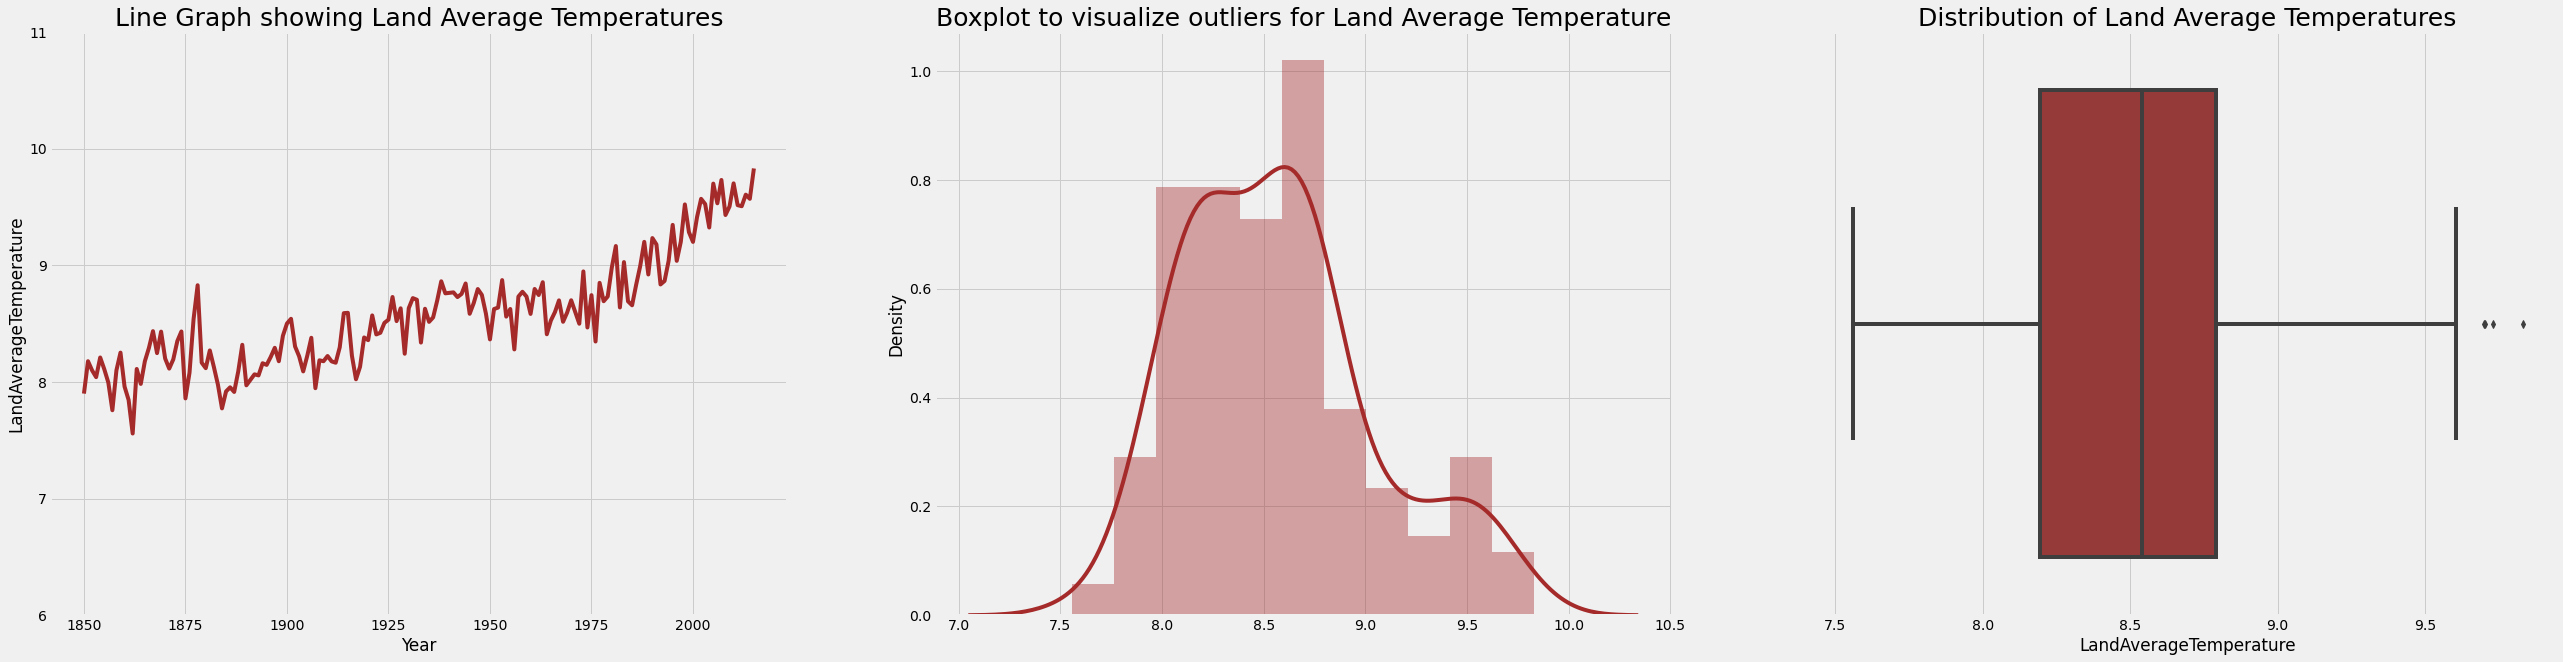

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(40,10))
sns.lineplot(ax=ax[0], x=df_global_land.index, y = df_global_land['LandAverageTemperature'], data=df_global_land, color='brown')
ax[0].set_ylim(6,11)
ax[0].set_title('Line Graph showing Land Average Temperatures', fontsize=25)

sns.distplot(ax=ax[1],a=df_global_land, norm_hist=True, color='brown')
ax[2].set_title('Distribution of Land Average Temperatures', fontsize=25)

sns.boxplot(df_global_land['LandAverageTemperature'], color='brown')
ax[1].set_title('Boxplot to visualize outliers for Land Average Temperature', fontsize=25)

An increasing trend is observed from the line graph.

The distplot is showing a somewhat normal distribution.

Not many outliers are observed from the boxplot.

Variation of land average temperature is plotted taking its uncertainty into consideration as well.

In [11]:
years=np.unique(df_global['Year'])
AvgTemp=[]
AvgTempUncertainty=[]
for year in years:
    AvgTemp.append(df_global[df_global['Year']==year]['LandAverageTemperature'].mean())
    AvgTempUncertainty.append(df_global[df_global['Year']==year]['LandAverageTemperatureUncertainty'].mean())
plot0=go.Scatter(
    x=years,
    y=np.array(AvgTemp)+np.array(AvgTempUncertainty),
    fill=None,
    mode='lines',
    name='Uncertainty top',
    line=dict(
    color='rgb(0, 325, 325)',
    )
)
plot1=go.Scatter(
    x= years,
    y=np.array(AvgTemp)-np.array(AvgTempUncertainty),
    fill='tonexty',
    mode='lines',
    name='Uncertainty Bottom',
    line=dict(
    color='rgb(0, 325, 325)',
    )
)
plot2=go.Scatter(
    x=years,
    y=np.array(AvgTemp),
    mode='lines',
    name='Average Temperature',
    line=dict(
    color='rgb(199, 121, 093)',
    )
)
Layout=go.Layout( 
    xaxis=dict(title='Year'),
    yaxis=dict(title='Land Average Temperatures'),
    title='Variation of Land Average Temperature with its Uncertainty from 1850-2000',
    showlegend=True,
)
data=[plot0,plot1, plot2]
fig=go.Figure(data=data, layout=Layout)
py.iplot(fig)


Grouping by year on the land & ocean average temperature column using average.

In [12]:
df_global_lo = df_global.groupby('Year').agg({'LandAndOceanAverageTemperature': np.average})
df_global_lo

LandAndOceanAverageTemperature
Year                                
1850                       14.867167
1851                       14.991833
1852                       15.006500
1853                       14.955167
1854                       14.991000
...                              ...
2011                       15.769500
2012                       15.802333
2013                       15.854417
2014                       15.913000
2015                       16.058583

[166 rows x 1 columns]

Text(0.5, 1.0, 'Boxplot to visualize outliers for Land & Ocean Temp')

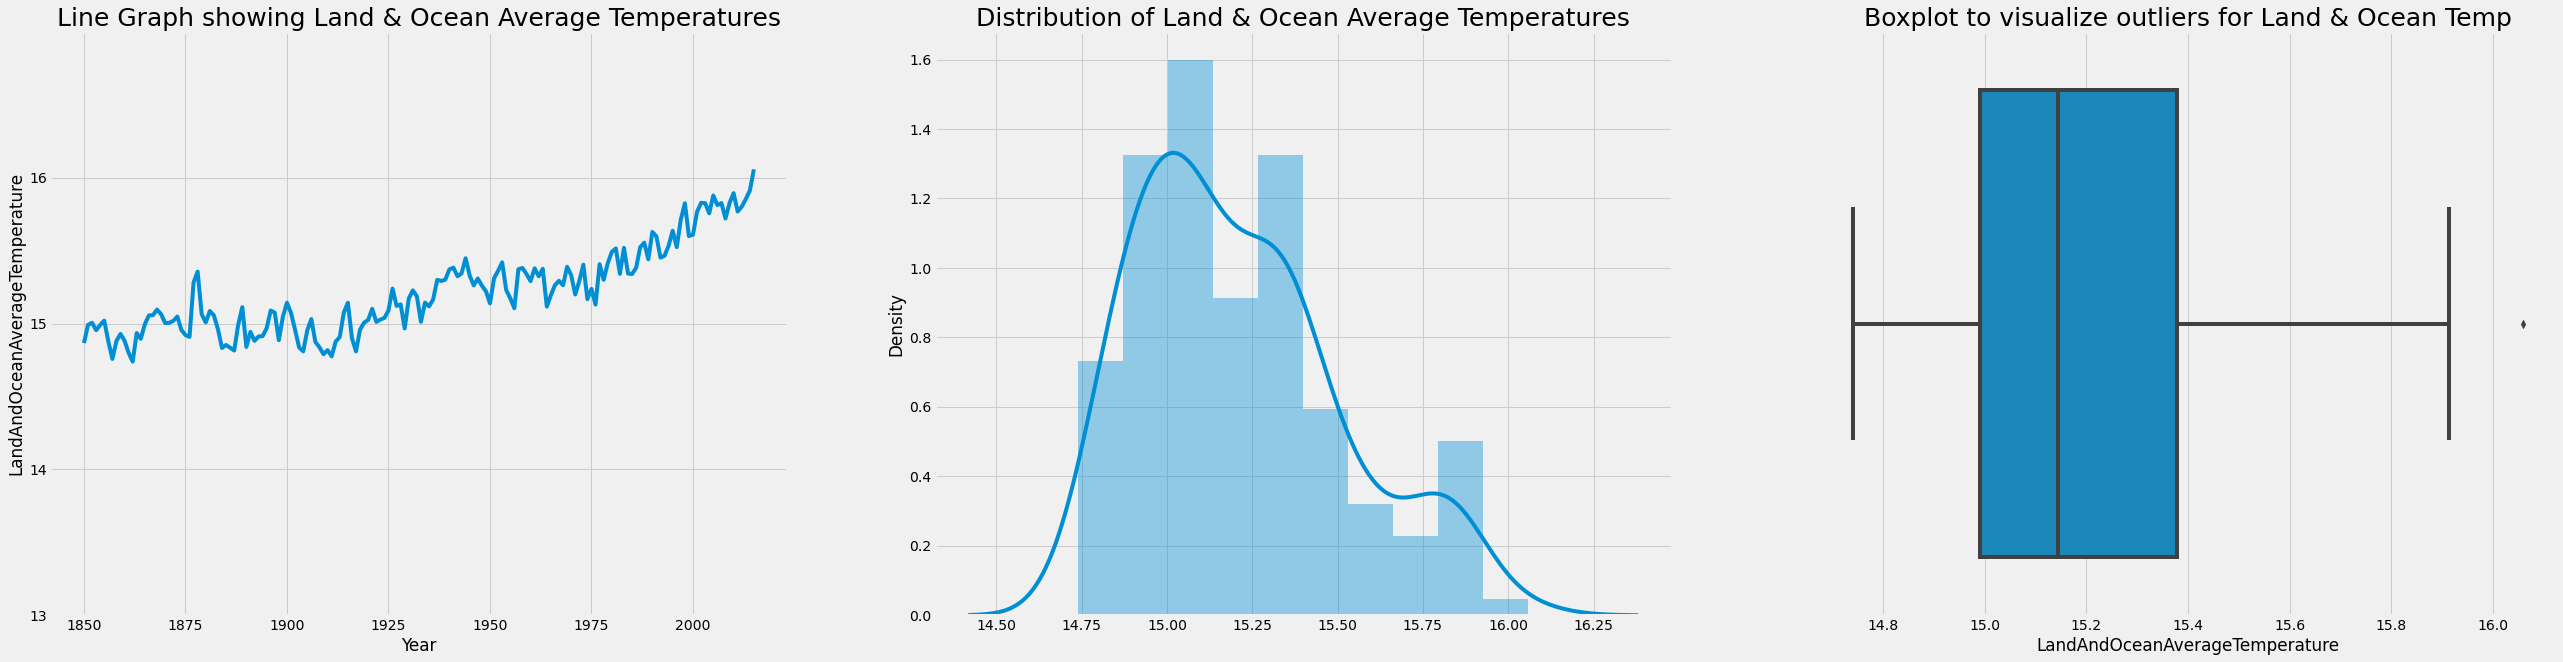

In [13]:
fig, ax = plt.subplots(1,3, figsize=(40,10))
sns.lineplot(ax=ax[0], y = df_global_lo['LandAndOceanAverageTemperature'], x=df_global_lo.index, data=df_global_lo)
ax[0].set_ylim(13,17)
ax[0].set_yticks(range(13,17))
ax[0].set_title('Line Graph showing Land & Ocean Average Temperatures', fontsize=25)

sns.distplot(ax=ax[1],a=df_global_lo, norm_hist=True)
ax[1].set_title('Distribution of Land & Ocean Average Temperatures', fontsize=25)

sns.boxplot(ax=ax[2],x=df_global_lo['LandAndOceanAverageTemperature'])
ax[2].set_title('Boxplot to visualize outliers for Land & Ocean Temp', fontsize=25)

Similar observations as to land average temperature are observed.

Line Graph showing the variation of land average temperature with land & ocean average temperature. 

In [14]:
years=np.unique(df_global['Year'])
land_temp=[]
ocean_temp=[]
for year in years:
    land_temp.append(df_global[df_global['Year']==year]['LandAndOceanAverageTemperature'].mean())
    ocean_temp.append(df_global[df_global['Year']==year]['LandAverageTemperature'].mean())
plot5=go.Scatter(
    x=years, 
    y= np.array(land_temp), 
    fill=None, mode='lines', 
    name=' Land & Ocean Average Temperature', 
    line=dict( color= 'rgb(00, 50, 150)',))
plot6=go.Scatter(
    x=years, 
    y= np.array(ocean_temp), 
    fill=None, mode='lines', 
    name='Land Average Temperature', 
    line=dict( color= 'rgb(0, 90, 50)',))
layout=go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='°C'),
    title='Variation of Land Average Temperatures with Land & Ocean Average Temperature',
    showlegend = True)
data=[plot5, plot6]
fig=go.Figure(data=data, layout=layout)
py.iplot(fig)

Grouping by year on the land max temperature column using average.

In [15]:
df_global_max = df_global.groupby('Year').agg({'LandMaxTemperature': np.max})
df_global_max

LandMaxTemperature
Year                    
1850              19.233
1851              17.361
1852              17.795
1853              19.308
1854              20.426
...                  ...
2011              21.320
2012              21.006
2013              20.737
2014              20.790
2015              20.904

[166 rows x 1 columns]

Text(0.5, 1.0, 'Boxplot to visualize outliers for Land Max Temperature')

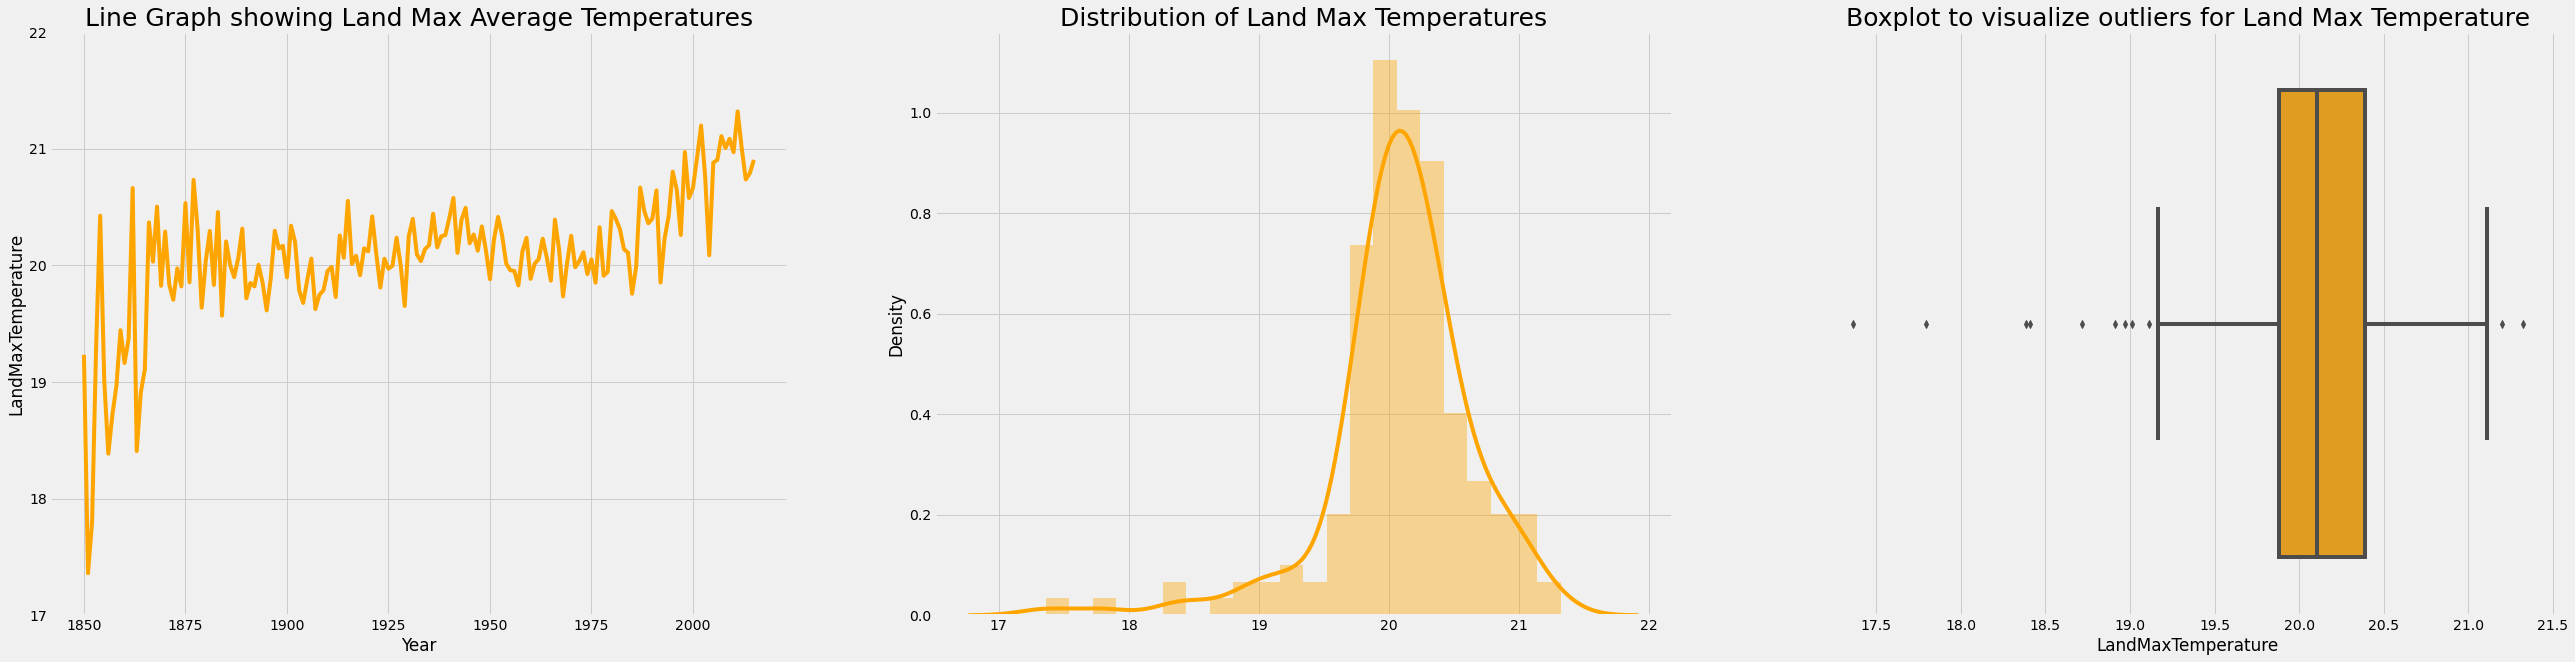

In [16]:
fig, ax = plt.subplots(1,3, figsize=(40,10))
sns.lineplot(ax=ax[0], y = df_global_max['LandMaxTemperature'], x=df_global_max.index, data=df_global_max, color='orange')
ax[0].set_ylim(17,22)
ax[0].set_title('Line Graph showing Land Max Average Temperatures', fontsize=25)

sns.distplot(ax=ax[1],a=df_global_max, norm_hist=True, color='orange')
ax[1].set_title('Distribution of Land Max Temperatures', fontsize=25)

sns.boxplot(df_global_max['LandMaxTemperature'], color='orange')
ax[2].set_title('Boxplot to visualize outliers for Land Max Temperature', fontsize=25)

There seems to be an increasing trend in the dataset.

The distribution is slightly skewed to the left.

Compared to previous plots, a few more number of outliers are observed.

Grouping by year on the land min temperature column using average.

In [17]:
df_global_min = df_global.groupby('Year').agg({'LandMinTemperature': np.min})
df_global_min

LandMinTemperature
Year                    
1850              -3.206
1851              -3.242
1852              -2.755
1853              -4.015
1854              -4.109
...                  ...
2011              -2.034
2012              -2.233
2013              -1.726
2014              -2.080
2015              -1.518

[166 rows x 1 columns]

Text(0.5, 1.0, 'Scatter Plot showing Land Min Temperatures')

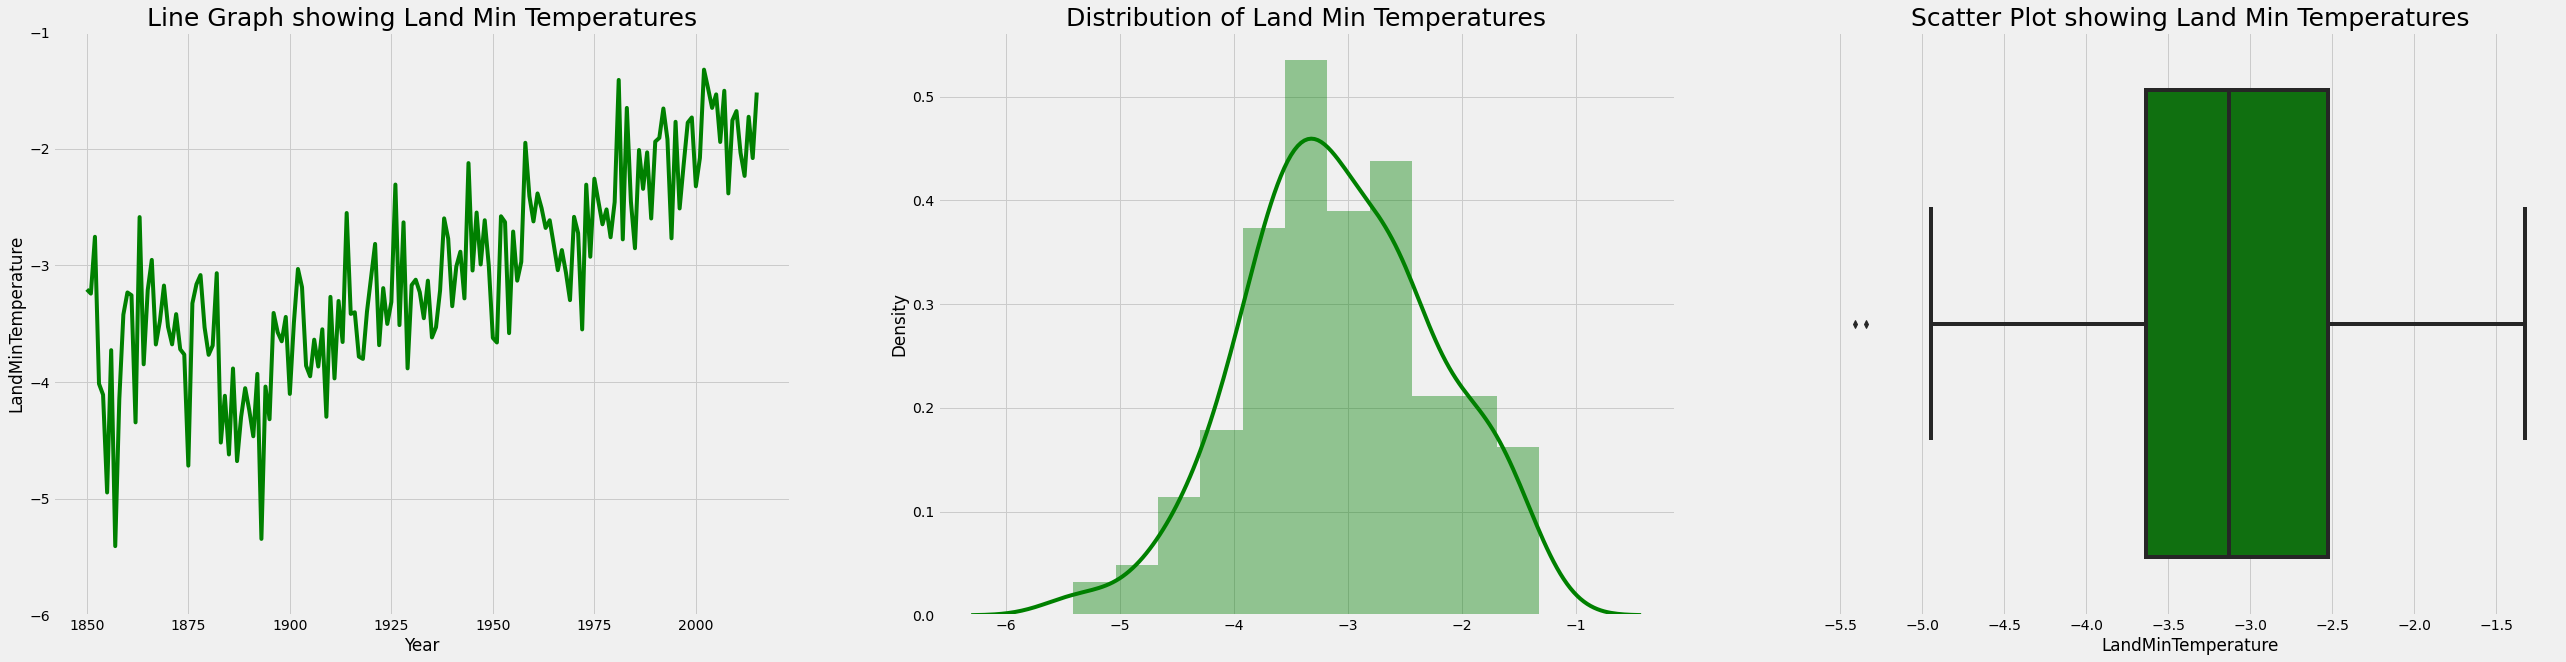

In [18]:
fig, ax = plt.subplots(1,3, figsize=(40,10))
sns.lineplot(ax=ax[0], y = df_global_min['LandMinTemperature'], x=df_global_min.index, data=df_global_min, color='green')
ax[0].set_ylim(-6,-1)
ax[0].set_title('Line Graph showing Land Min Temperatures', fontsize=25)

sns.distplot(ax=ax[1],a=df_global_min, norm_hist=True, color='green')
ax[1].set_title('Distribution of Land Min Temperatures', fontsize=25)

sns.boxplot(df_global_min['LandMinTemperature'], color='green')
ax[2].set_title('Scatter Plot showing Land Min Temperatures', fontsize=25)

Once again, there seems to be an increasing trend in the dataset.

The distribution is somewhat normal.

Very few outliers are observed.

Line Graph showing the variation of land maximum temperature with land minimum temperature.

In [19]:
max_temp=[]
min_temp=[]
for year in years:
    max_temp.append(df_global[df_global['Year']==year]['LandMaxTemperature'].max())
    min_temp.append(df_global[df_global['Year']==year]['LandMinTemperature'].min())
plot3=go.Scatter(
    x=years, 
    y= np.array(max_temp), 
    fill=None, mode='lines', 
    name='Max Temperature', 
    line=dict( color= 'rgb(00, 50, 150)',))
plot4=go.Scatter(
    x=years, 
    y= np.array(min_temp), 
    fill=None, mode='lines', 
    name='Min Temperature', 
    line=dict( color= 'rgb(0, 90, 50)',))
layout=go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Maximum Temperature °C'),
    title='Variation of Land Maximum Temperature with Land Minimum Temperature',
    showlegend = True)
data=[plot3, plot4]
fig=go.Figure(data=data, layout=layout)
py.iplot(fig)

### Dataset - Country wise Temperatures

Reading the data from the csv file and taking a look at it.

In [20]:
df_Country=pd.read_csv('GlobalLandTemperaturesByCountry.csv',index_col='dt',parse_dates=True)
df_Country.dropna(inplace=True)
df_Country=df_Country[13:]
df_Country1=df_Country.groupby('Country').agg({'AverageTemperature':np.average})
type(df_Country.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [21]:
df_Country

AverageTemperature  AverageTemperatureUncertainty   Country
dt                                                                     
1750-01-01               1.091                          1.119     Åland
1750-02-01               0.809                          3.353     Åland
1750-03-01               0.923                          4.716     Åland
1750-04-01               3.943                          1.434     Åland
1750-05-01               6.265                          1.339     Åland
...                        ...                            ...       ...
2013-04-01              21.142                          0.495  Zimbabwe
2013-05-01              19.059                          1.022  Zimbabwe
2013-06-01              17.613                          0.473  Zimbabwe
2013-07-01              17.000                          0.453  Zimbabwe
2013-08-01              19.759                          0.717  Zimbabwe

[544798 rows x 3 columns]

In [22]:
df_Country.shape

(544798, 3)

In [23]:
df_Country.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 544798 entries, 1750-01-01 to 2013-08-01
Data columns (total 3 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   AverageTemperature             544798 non-null  float64
 1   AverageTemperatureUncertainty  544798 non-null  float64
 2   Country                        544798 non-null  object 
dtypes: float64(2), object(1)
memory usage: 16.6+ MB


In [24]:
df_Country.describe()

AverageTemperature  AverageTemperatureUncertainty
count       544798.000000                  544798.000000
mean            17.193687                       1.019171
std             10.953839                       1.202634
min            -37.658000                       0.052000
25%             10.026000                       0.323000
50%             20.901000                       0.571000
75%             25.814000                       1.207000
max             38.842000                      15.003000

In [25]:
df_Country.Country.unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt'

Counting the unique values.

In [26]:
df_Country.nunique()

AverageTemperature               76604
AverageTemperatureUncertainty     8979
Country                            242
dtype: int64

In [27]:
df_Country.dtypes

AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

The variation of temperatures among various countries is visualised.

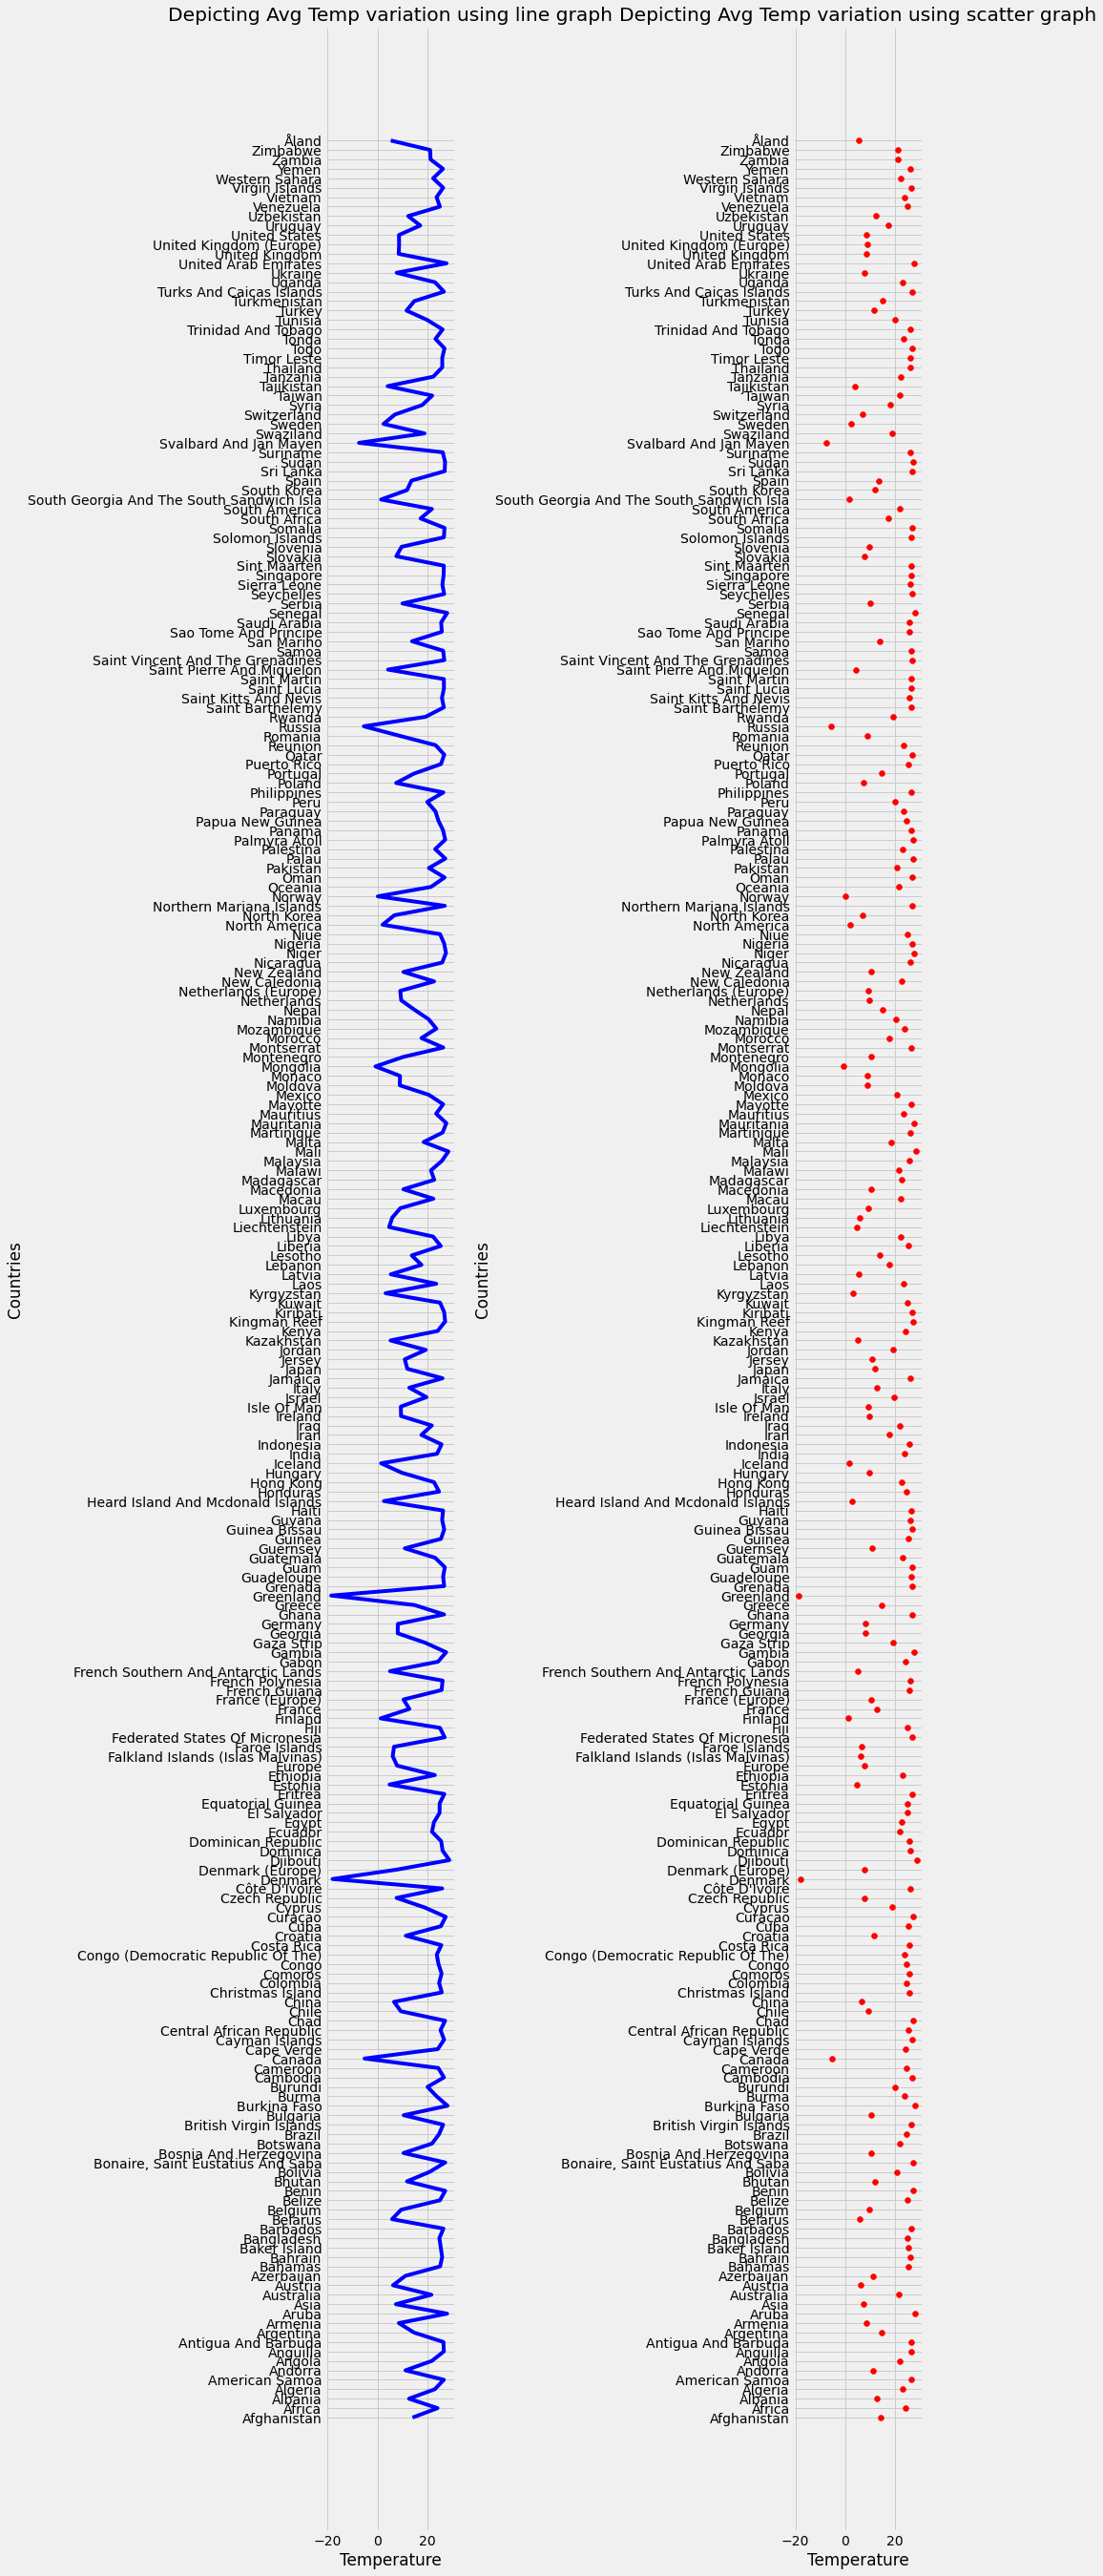

In [28]:
fig=plt.figure(figsize=(10,45))
plt.xticks(rotation=90)
plt.subplot(1,4,1).set_title('Depicting Avg Temp variation using line graph')
plt.xlabel('Temperature')
plt.ylabel('Countries')
plt.plot(df_Country1['AverageTemperature'],df_Country1.index,color='blue')
plt.subplot(1,4,4).set_title('Depicting Avg Temp variation using scatter graph')
plt.xlabel('Temperature')
plt.ylabel('Countries')
plt.scatter(df_Country1['AverageTemperature'],df_Country1.index,color='red')

Minimum and maximum temperatures of different countries are also compared.

Text(0, 0.5, 'Countries')

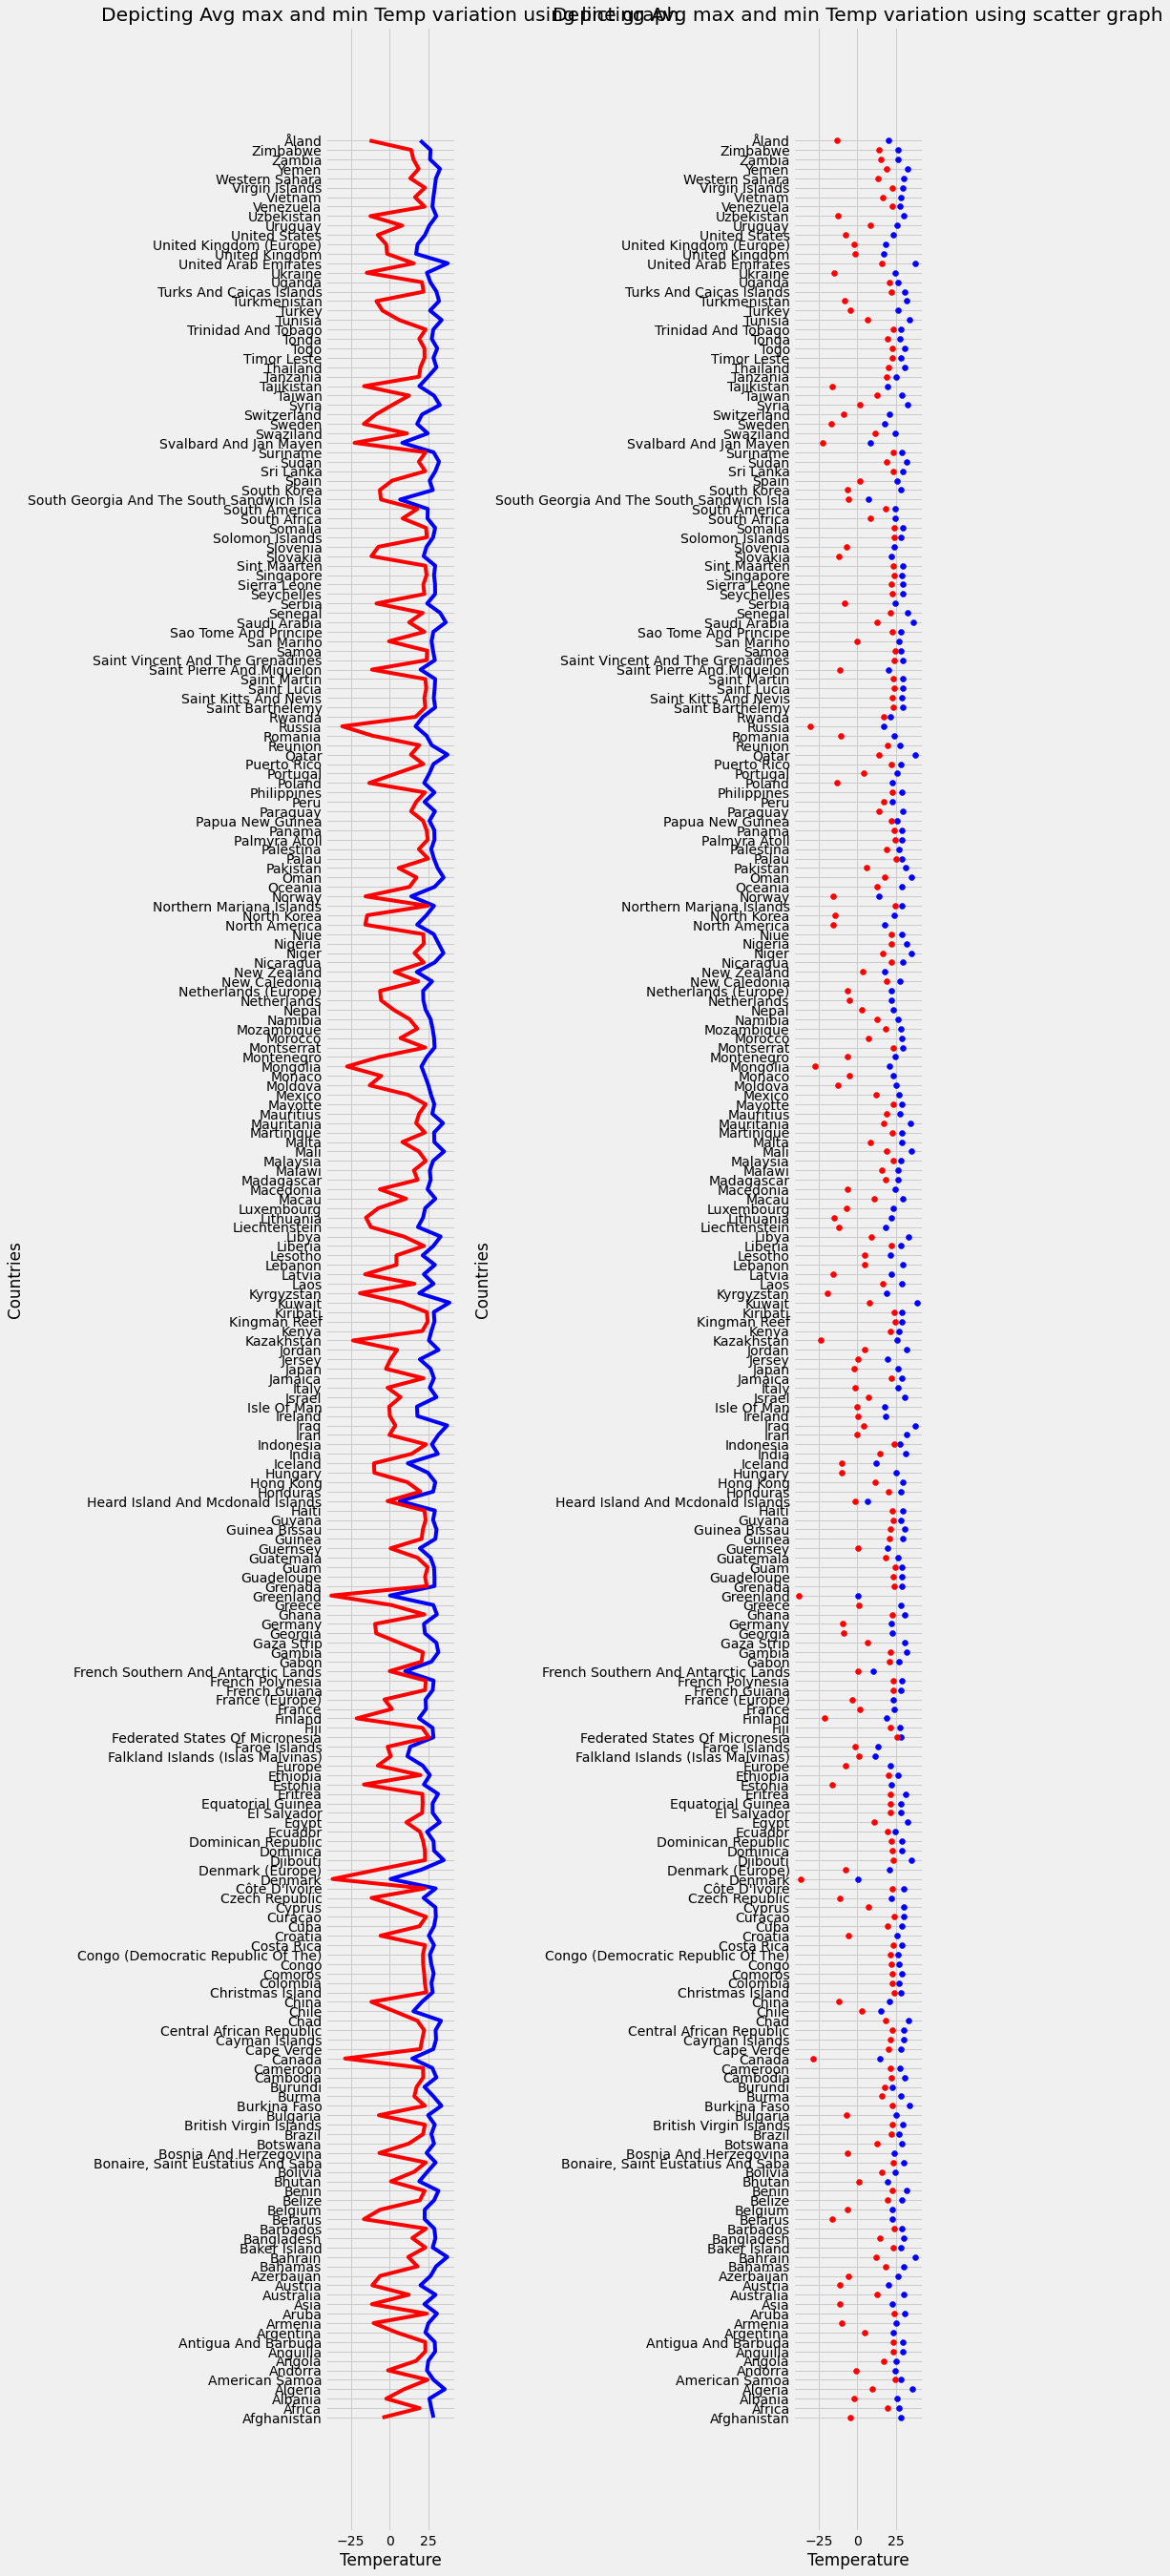

In [29]:
df_Country2_max=df_Country.groupby('Country').agg({'AverageTemperature':np.max})
df_Country2_max.rename(columns={'AverageTemperature':'maxavgtemp'},inplace=True)
df_Country2_min=df_Country.groupby('Country').agg({'AverageTemperature':np.min})
df_Country2_min.rename(columns={'AverageTemperature':'minavgtemp'},inplace=True)

fig=plt.figure(figsize=(10,45))
plt.xticks(rotation=90)
plt.subplot(1,4,1).set_title('Depicting Avg max and min Temp variation using line graph')
plt.plot(df_Country2_max['maxavgtemp'],df_Country2_max.index,color='blue')
plt.plot(df_Country2_min['minavgtemp'],df_Country2_min.index,color='red')
plt.xlabel('Temperature')
plt.ylabel('Countries')
plt.subplot(1,4,4).set_title('Depicting Avg max and min Temp variation using scatter graph')
plt.scatter(df_Country2_max['maxavgtemp'],df_Country2_max.index,color='blue')
plt.scatter(df_Country2_min['minavgtemp'],df_Country2_min.index,color='red')
plt.xlabel('Temperature')
plt.ylabel('Countries')

Looking at the temperature over the years of just India, by calculating the rolling mean as this smoothens out the curve and gives a better understanding.

Compared to global temperatures, the increase seems to be very slight.

Considering only India and visualising the change.

In [30]:
df_Country['year']=df_Country.index.year
india = df_Country[df_Country.Country == 'India']
india.set_index(['year'], inplace=True)
df_State_India= india.groupby('year').mean().reset_index()
df_State_India.iplot(kind='scatter', x='year', y='AverageTemperature', title='Average Temperature of India over the years', xTitle='Year', yTitle='Temperature', size=(15,5))


Sorting the temperature values and plotting them accordingly.

<BarContainer object of 242 artists>

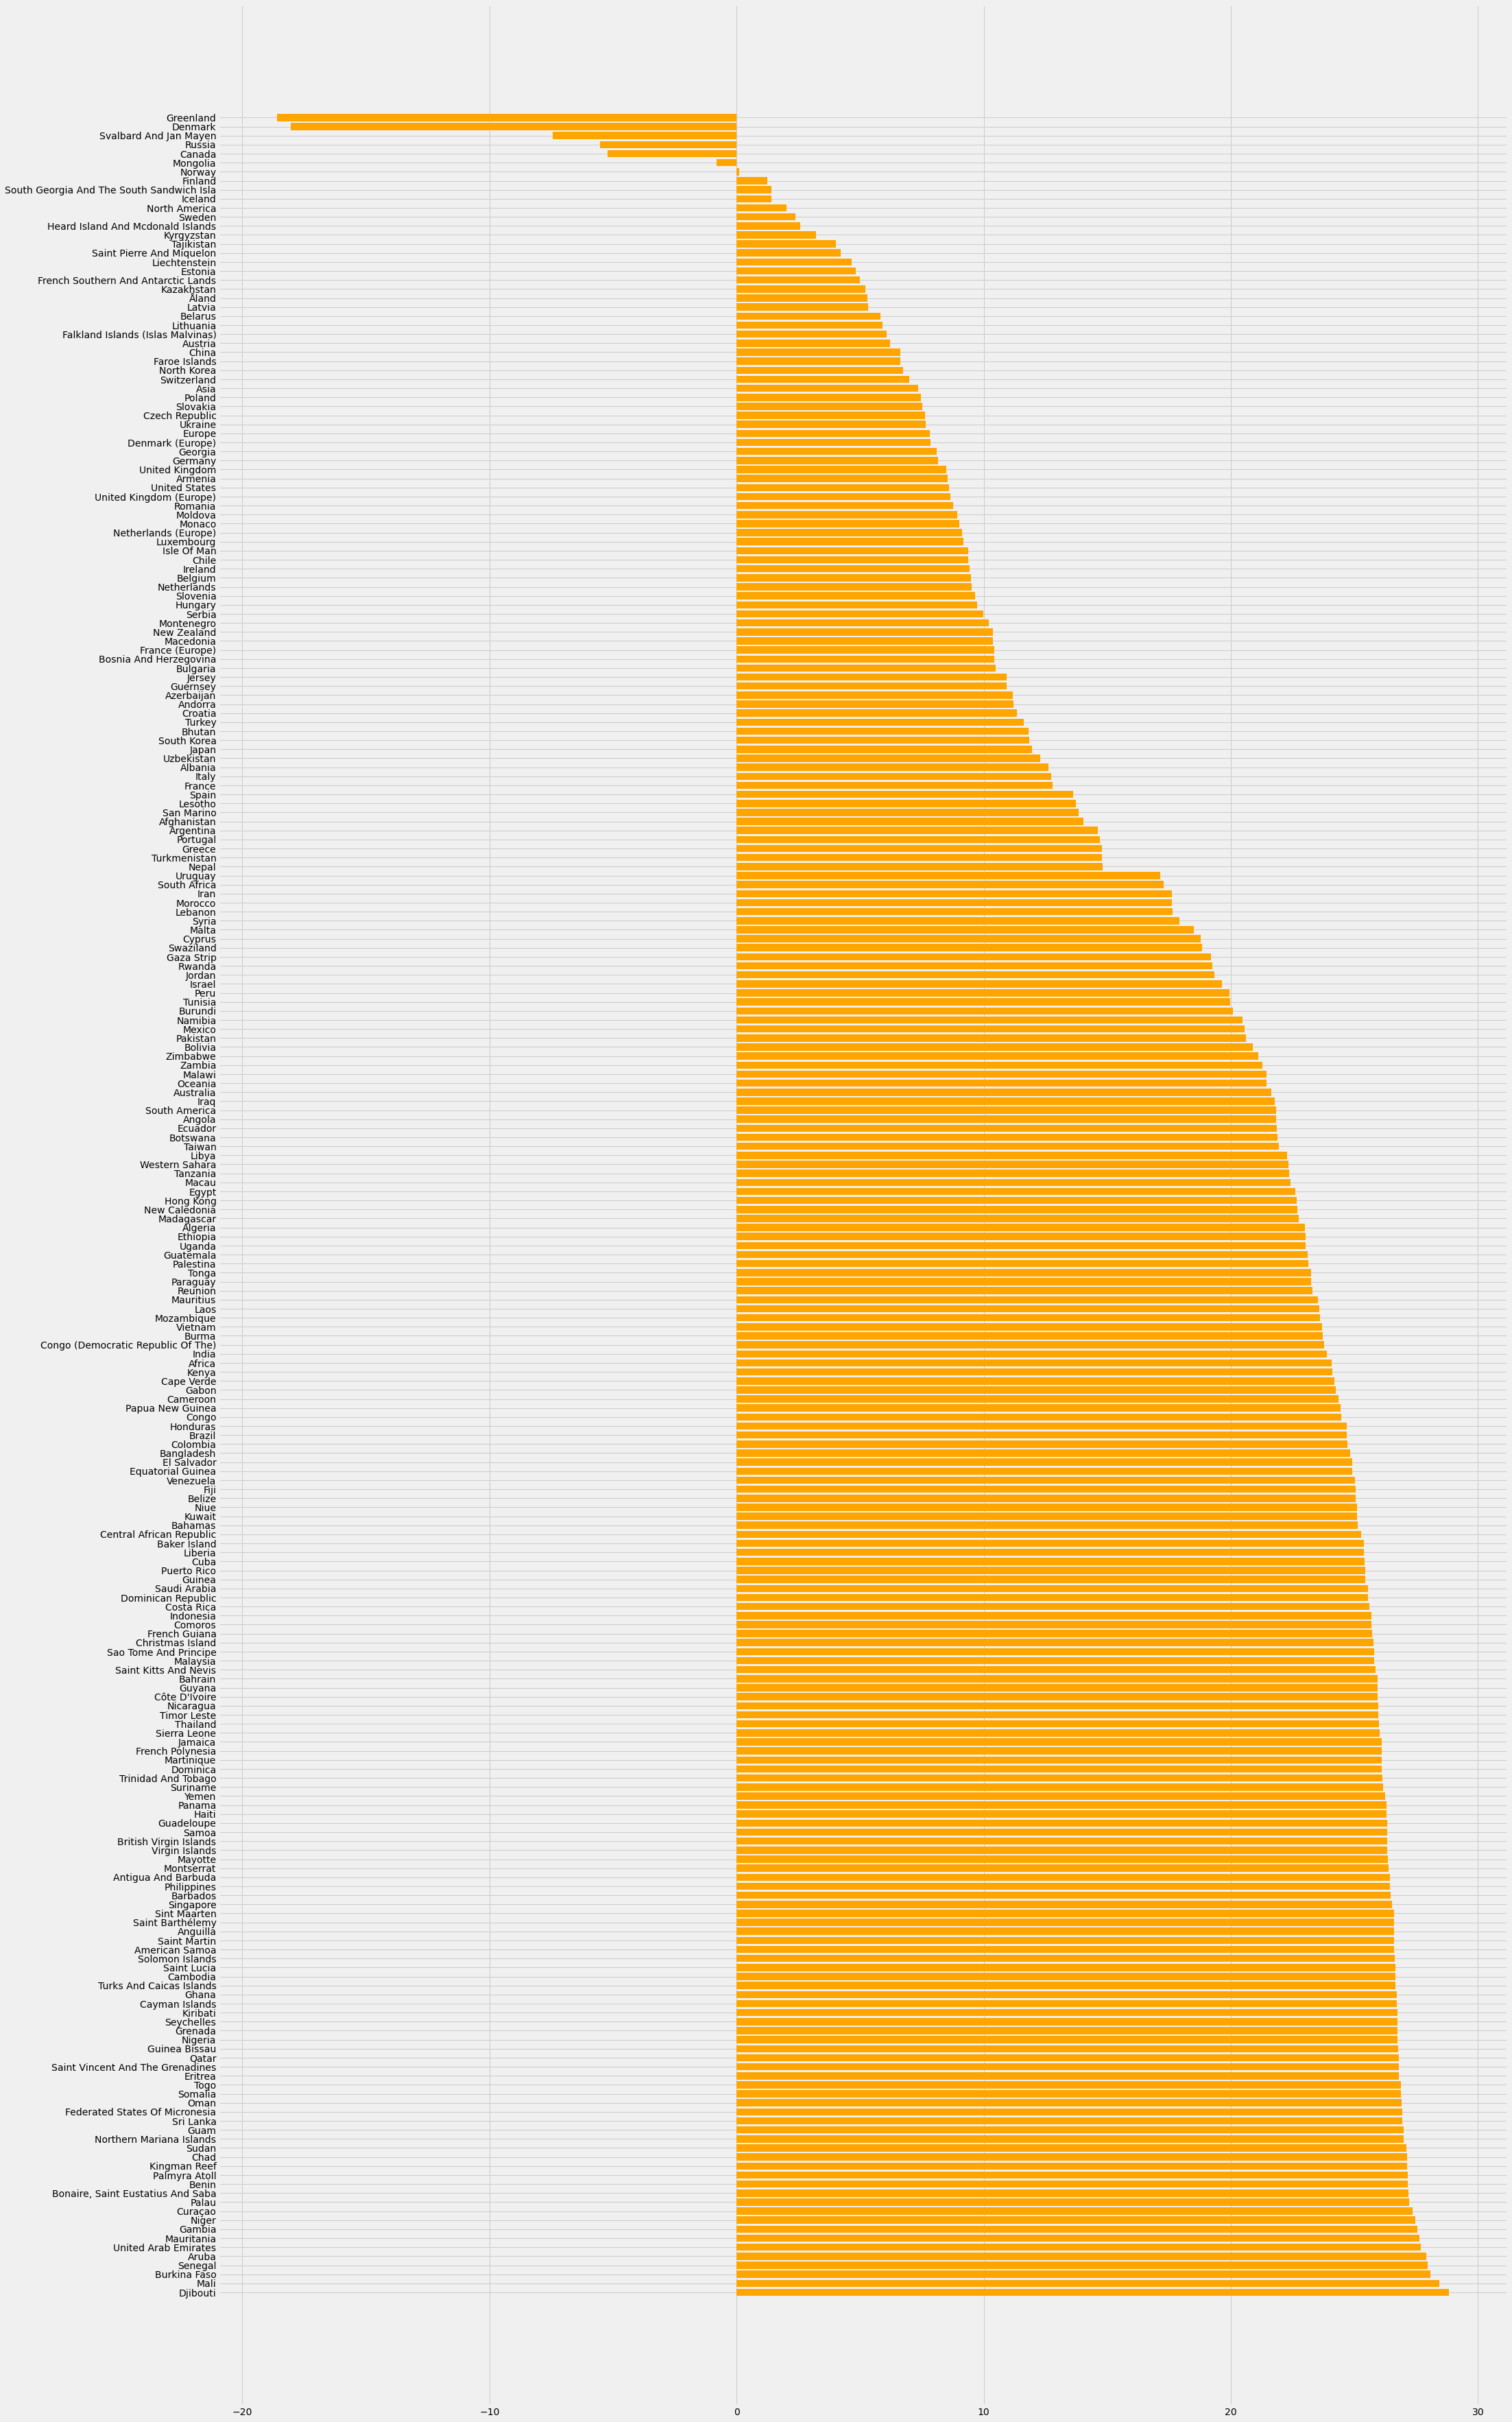

In [31]:
df_Country4=pd.DataFrame(df_Country1['AverageTemperature'].sort_values(ascending=False))
fig=plt.figure(figsize=(30,60))
plt.barh(df_Country4.index,df_Country4['AverageTemperature'], color = 'orange')

Average temperatures over the years in different continents.

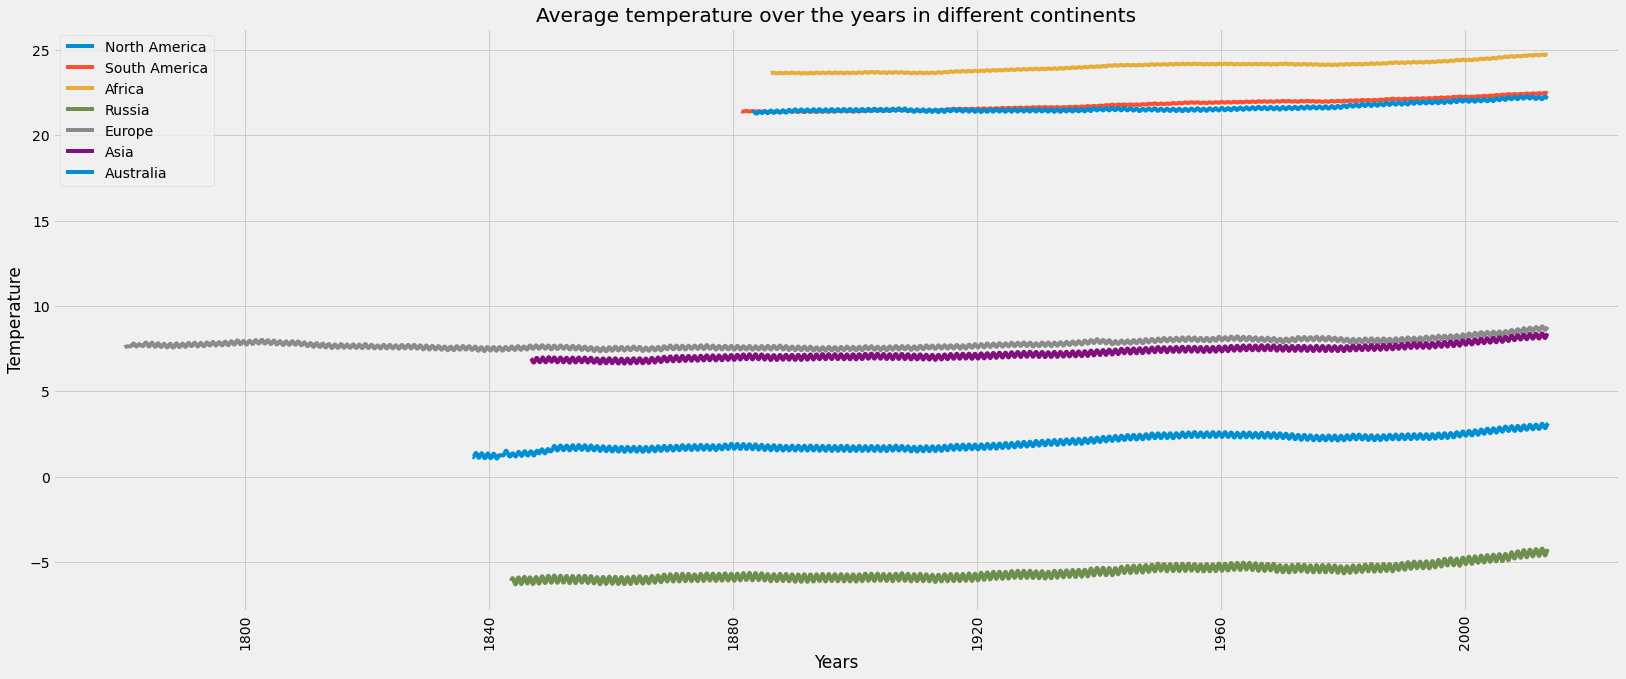

In [32]:
continents=['North America','South America','Africa','Russia','Europe','Asia','Australia']
fig=plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.title('Average temperature over the years in different continents')
for x in continents:
    df_Country5=df_Country[df_Country['Country']==x].rolling(window=365).mean()
    plt.plot(df_Country5.index,df_Country5['AverageTemperature'],label=x)
    plt.legend()

In [33]:
continents=['North America','South America','Africa','Russia','Europe','Asia','Australia']
for x in continents:
    df_Country5=df_Country[df_Country['Country']==x].rolling(window=365).mean()
    df_Country5.iplot(kind='line',y='AverageTemperature',title=x,xTitle='Years',yTitle='Temperature', size=(2,2))

Map showing the average temperature of different countries around the world.

In [34]:
Averagetemp = df_Country1.groupby(by = ['Country']).mean().reset_index()
map = px.choropleth(Averagetemp, locations="Country", locationmode = "country names", color="AverageTemperature", 
                    color_continuous_scale=px.colors.diverging.BrBG,
                    title="Average Temperature Country-wise all over the World")
map.show()

Map showing the average temperature uncertainty of different countries around the world.

In [35]:
AveragetempUncertainty = df_Country.groupby(by = ['Country']).mean().reset_index()
map = px.choropleth(AveragetempUncertainty, locations="Country", locationmode = "country names", color="AverageTemperatureUncertainty",
                    color_continuous_scale=px.colors.diverging.BrBG,
                    title="Average Temperature Uncertainty Country-wise all over the World")
map.show()

### Dataset - Statewise Temperatures

Reading the data from the csv file and taking a look at it.

In [36]:
df_state=pd.read_csv('GlobalLandTemperaturesByState.csv.',index_col='dt',parse_dates=True)
df_state[8:]

AverageTemperature  AverageTemperatureUncertainty     State  \
dt                                                                        
1856-01-01              25.814                          1.159      Acre   
1856-02-01              24.658                          1.147      Acre   
1856-03-01              24.659                          1.547      Acre   
1856-04-01              24.907                          1.186      Acre   
1856-05-01              24.418                          1.168      Acre   
...                        ...                            ...       ...   
2013-05-01              21.634                          0.578  Zhejiang   
2013-06-01              24.679                          0.596  Zhejiang   
2013-07-01              29.272                          1.340  Zhejiang   
2013-08-01              29.202                          0.869  Zhejiang   
2013-09-01                 NaN                            NaN  Zhejiang   

           Country  
dt                  
1856-01-01  Brazil  
1856-02-01  Brazil  
1856-03-01  Brazil  
1856-04-01  Brazil  
1856-05-01  Brazil  
...            ...  
2013-05-01   China  
2013-06-01   China  
2013-07-01   China  
2013-08-01   China  
2013-09-01   China  

[645667 rows x 4 columns]

In [37]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 645675 entries, 1855-05-01 to 2013-09-01
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   AverageTemperature             620027 non-null  float64
 1   AverageTemperatureUncertainty  620027 non-null  float64
 2   State                          645675 non-null  object 
 3   Country                        645675 non-null  object 
dtypes: float64(2), object(2)
memory usage: 24.6+ MB


In [38]:
df_state.isnull().sum()

AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

Dropping the null values.

In [39]:
df_state.dropna(inplace=True)
df_state['year']=df_state.index.year
df_state.head()

AverageTemperature  AverageTemperatureUncertainty State Country  \
dt                                                                            
1855-05-01              25.544                          1.171  Acre  Brazil   
1855-06-01              24.228                          1.103  Acre  Brazil   
1855-07-01              24.371                          1.044  Acre  Brazil   
1855-08-01              25.427                          1.073  Acre  Brazil   
1855-09-01              25.675                          1.014  Acre  Brazil   

            year  
dt                
1855-05-01  1855  
1855-06-01  1855  
1855-07-01  1855  
1855-08-01  1855  
1855-09-01  1855

In [40]:
df_state.describe()

AverageTemperature  AverageTemperatureUncertainty           year
count       620027.000000                  620027.000000  620027.000000
mean             8.993111                       1.287647    1902.331598
std             13.772150                       1.360392      67.831393
min            -45.389000                       0.036000    1743.000000
25%             -0.693000                       0.316000    1851.000000
50%             11.199000                       0.656000    1906.000000
75%             19.899000                       1.850000    1960.000000
max             36.339000                      12.646000    2013.000000

In [41]:
df_state.State.unique()

array(['Acre', 'Adygey', 'Aga Buryat', 'Alabama', 'Alagoas', 'Alaska',
       'Alberta', 'Altay', 'Amazonas', 'Amur', 'Andaman And Nicobar',
       'Andhra Pradesh', 'Anhui', 'Arizona', 'Arkansas', "Arkhangel'Sk",
       'Arunachal Pradesh', 'Assam', "Astrakhan'",
       'Australian Capital Territory', 'Bahia', 'Bashkortostan',
       'Beijing', 'Belgorod', 'Bihar', 'British Columbia', 'Bryansk',
       'Buryat', 'California', 'Chandigarh', 'Chechnya', 'Chelyabinsk',
       'Chhattisgarh', 'Chita', 'Chongqing', 'Chukot', 'Chuvash',
       'City Of St. Petersburg', 'Colorado', 'Connecticut',
       'Dadra And Nagar Haveli', 'Dagestan', 'Daman And Diu', 'Delaware',
       'Delhi', 'District Of Columbia', 'Distrito Federal', 'Evenk',
       'Florida', 'Fujian', 'Gansu', 'Georgia (State)', 'Goa',
       'Gorno Altay', 'Guangdong', 'Guangxi', 'Guizhou', 'Gujarat',
       'Hainan', 'Haryana', 'Hawaii', 'Hebei', 'Heilongjiang', 'Henan',
       'Himachal Pradesh', 'Hubei', 'Hunan', 'Idaho', 'I

In [42]:
df_state.dtypes

AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
year                               int64
dtype: object

Grouping by country on average temperature using mean.

In [43]:
Averagetemp=df_state.groupby('Country').agg({'AverageTemperature':np.mean}).reset_index()
Averagetemp

Country  AverageTemperature
0      Australia           17.664222
1         Brazil           23.770601
2         Canada           -1.321079
3          China           11.206830
4          India           22.534576
5         Russia            1.808555
6  United States           10.701555

Map depicting the average temperature grouped by country for this state dataset.

In [44]:
map = px.choropleth(Averagetemp, locations="Country", locationmode = "country names", color="AverageTemperature",
                    color_continuous_scale=px.colors.diverging.BrBG,
                    title="Average Temperature grouped by Country for the State Dataset")
map.show()

Plotting the average temperature and average temperature uncertainty for various states.

Text(0.5, 1.0, 'AverageTemperatureUncertainty vs States')

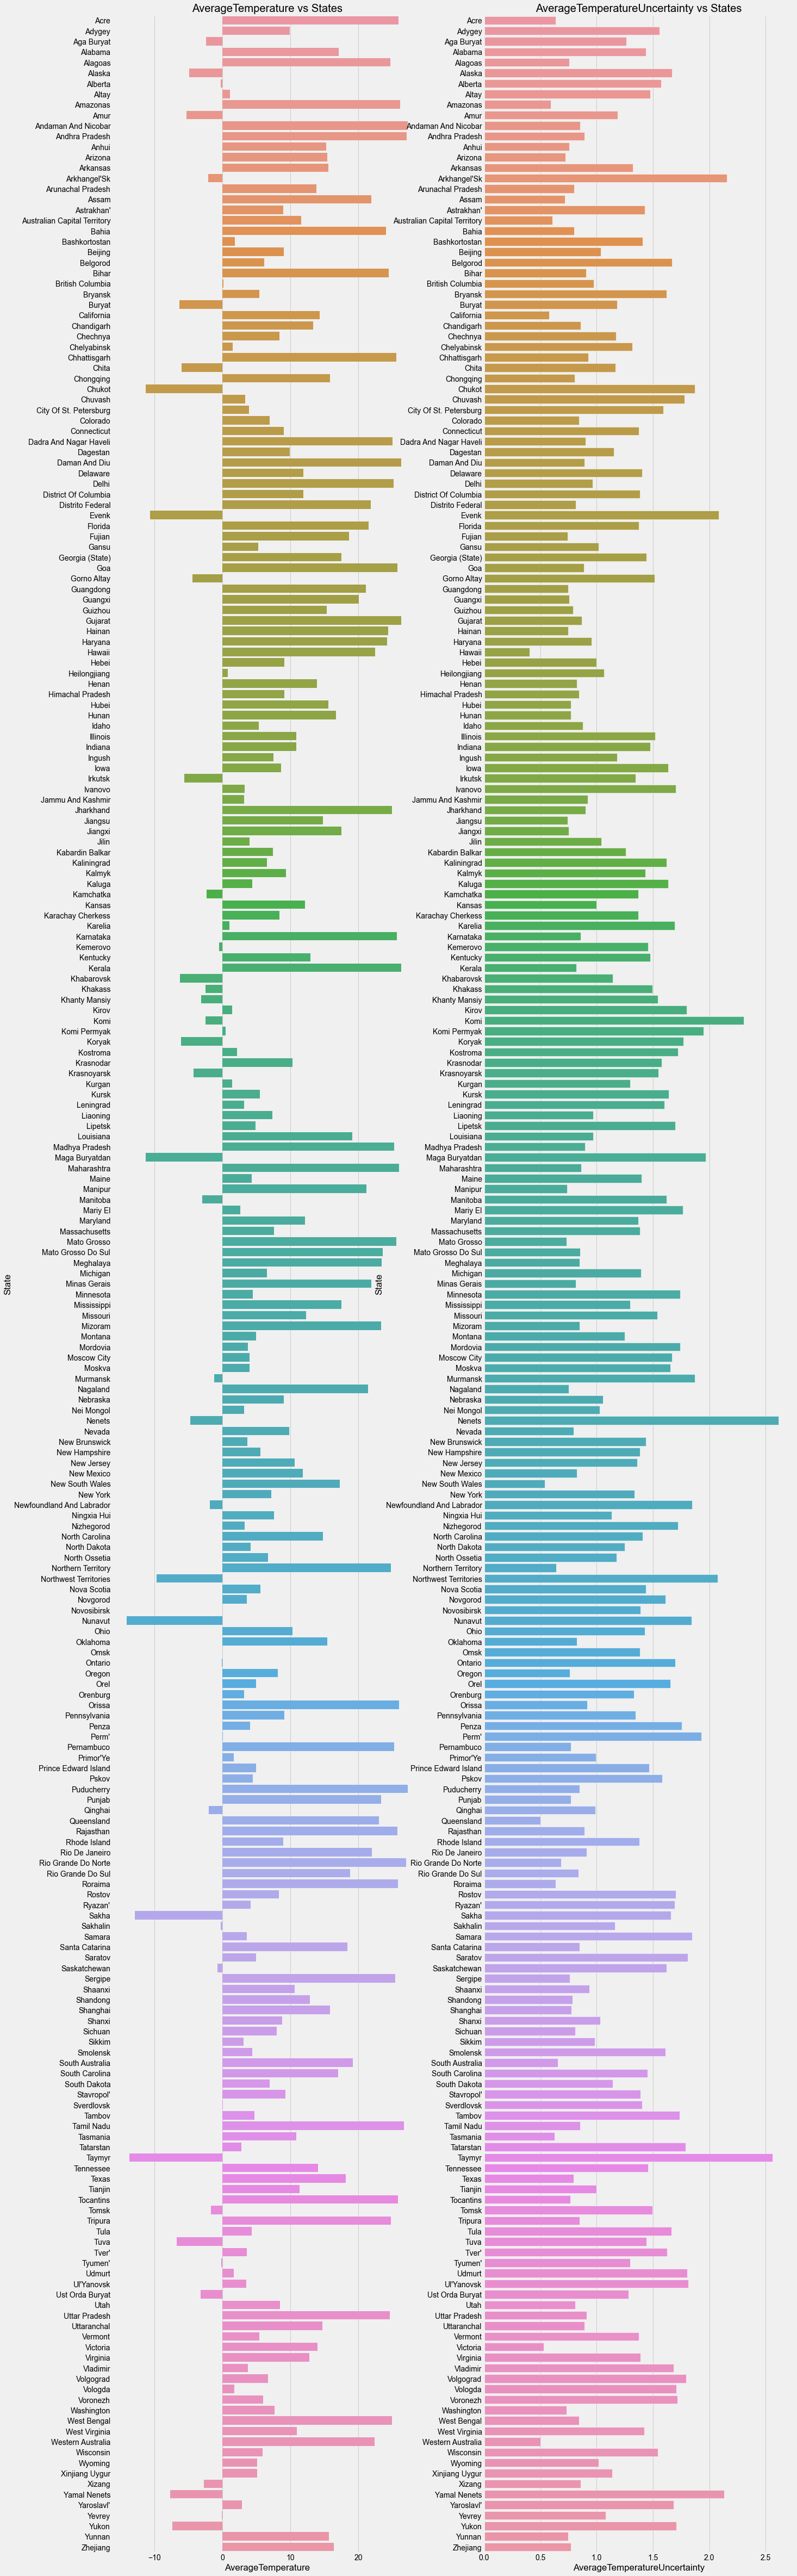

In [45]:
df_state_gp=df_state.groupby('State').agg({'AverageTemperature':np.mean}).reset_index()
df_state_gp2=df_state.groupby('State').agg({'AverageTemperatureUncertainty':np.mean}).reset_index()
fig, ax=plt.subplots(1,2,figsize=(20,80))
sns.barplot( ax=ax[0], x='AverageTemperature', y='State', data=df_state_gp)
ax[0].set_title("AverageTemperature vs States")
sns.set_style('darkgrid')
sns.barplot(x='AverageTemperatureUncertainty', y='State', data=df_state_gp2, ci=20)
ax[1].set_title("AverageTemperatureUncertainty vs States")

Looking at how the average temperature varies with its uncertainty.

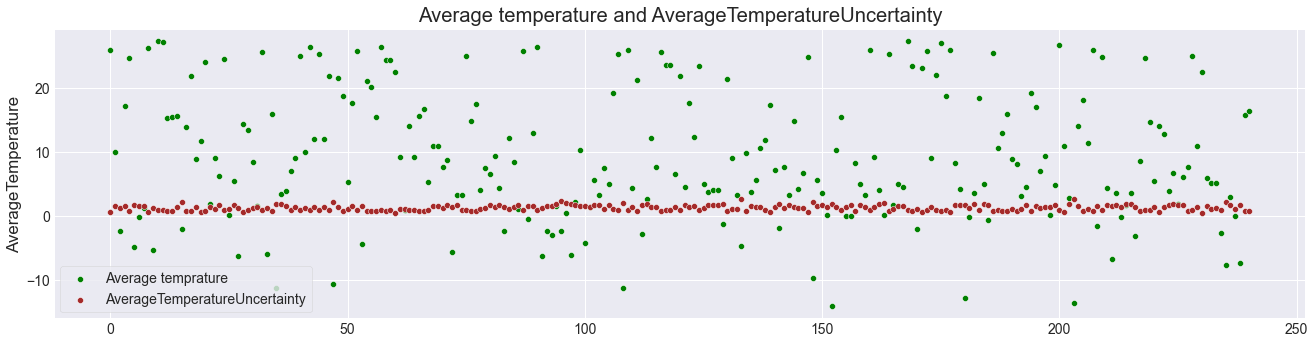

In [46]:
fig, ax= plt.subplots(figsize=(20,5))
sns.scatterplot(ax=ax, y= df_state_gp['AverageTemperature'], x=df_state_gp.index, data=df_state_gp, color='green', label='Average temprature')
sns.scatterplot(ax=ax, y= df_state_gp2['AverageTemperatureUncertainty'], x=df_state_gp2.index, data=df_state_gp2, color='brown', label='AverageTemperatureUncertainty')
plt.title('Average temperature and AverageTemperatureUncertainty')
plt.legend()

Comparing the minimum and maximum temperatures of various states.

Comparing maximum and minimum average temperatures of each state


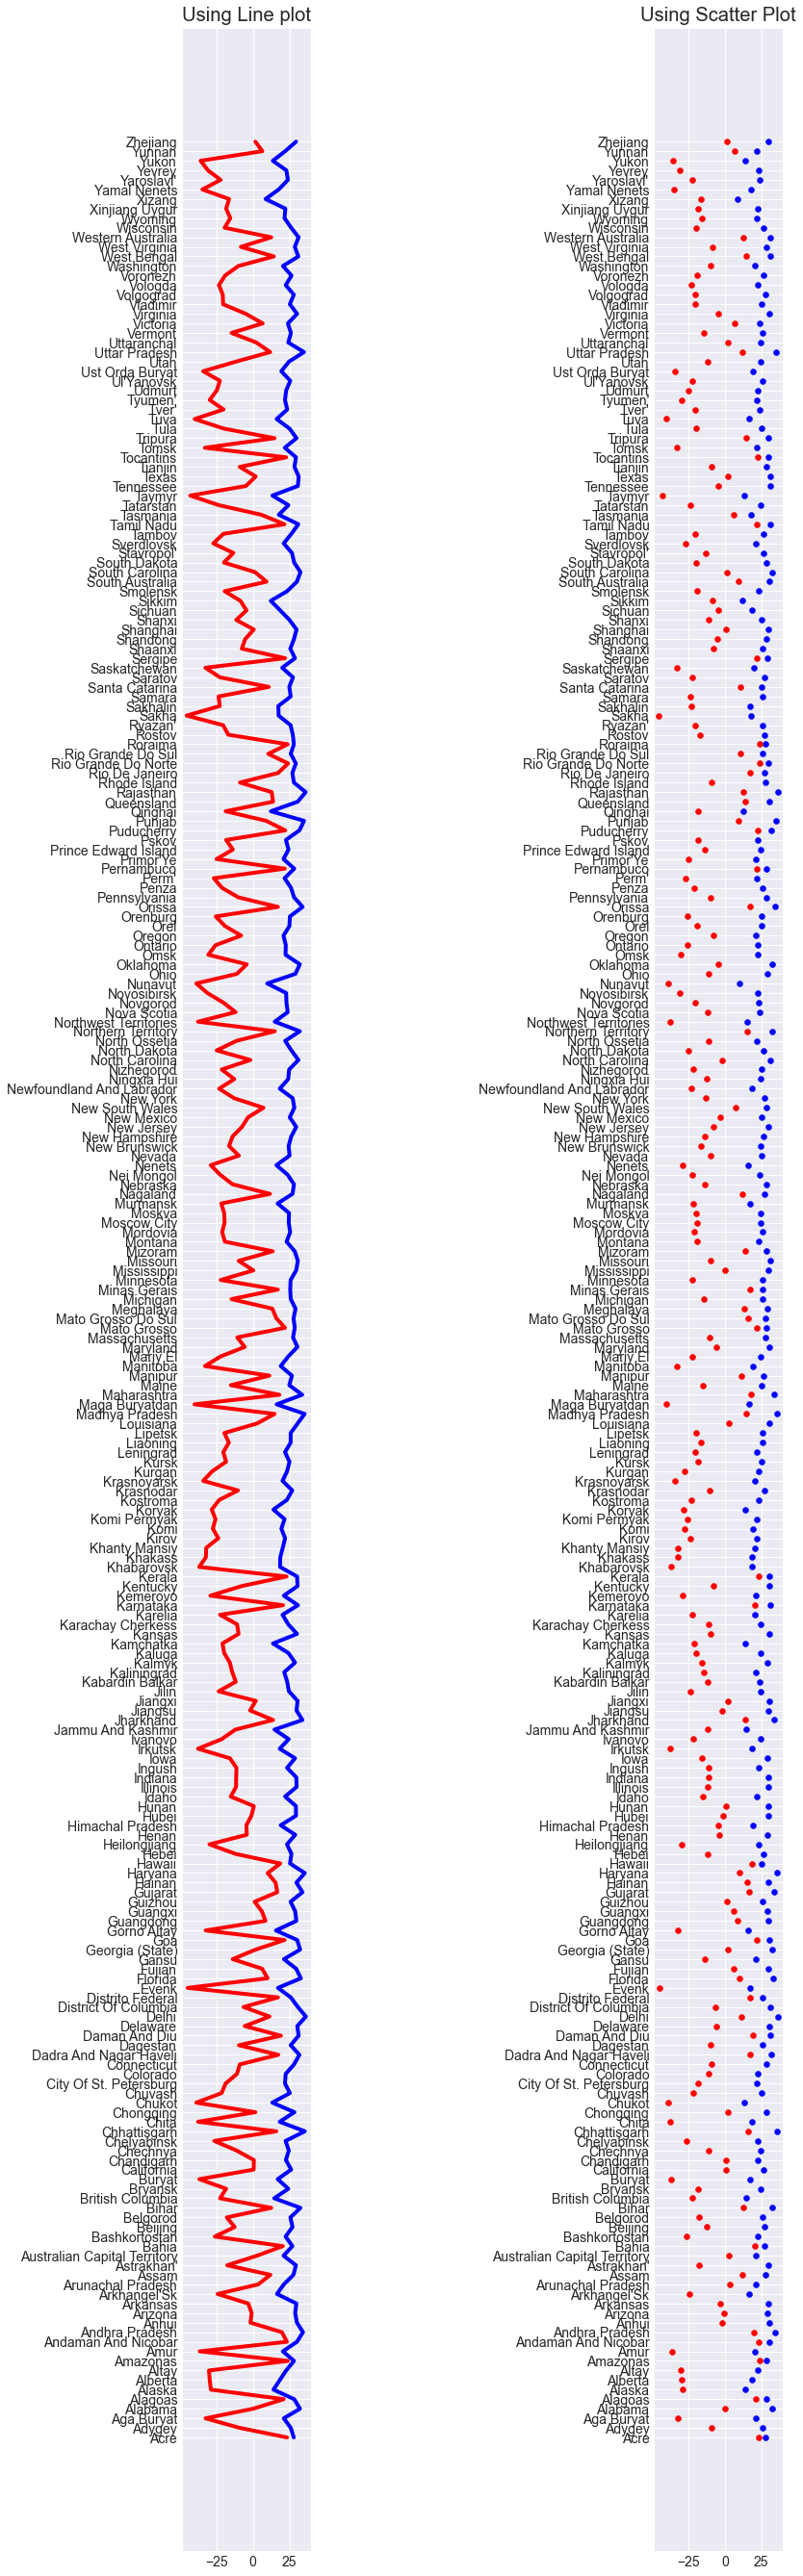

In [47]:
print("Comparing maximum and minimum average temperatures of each state")
df_state_max=df_state.groupby('State').agg({'AverageTemperature':np.max})
df_state_min=df_state.groupby('State').agg({'AverageTemperature':np.min})
df_state_max.rename(columns={'AverageTemperature':'maxavg'},inplace=True)
df_state_min.rename(columns={'AverageTemperature':'minavg'},inplace=True)

fig=plt.figure(figsize=(10,45))
plt.xticks(rotation=90)

plt.subplot(1,4,1).set_title('Using Line plot')
plt.plot(df_state_max['maxavg'],df_state_max.index,color='blue')
plt.plot(df_state_min['minavg'],df_state_min.index,color='red')

plt.subplot(1,4,4).set_title('Using Scatter Plot')
plt.scatter(df_state_max['maxavg'],df_state_max.index,color='blue')
plt.scatter(df_state_min['minavg'],df_state_min.index,color='red')


Grouping by India.

In [48]:
df_state_India=df_state[df_state['Country']=='India']
df_state_India=df_state_India.groupby('State')['AverageTemperature'].mean().reset_index()
df_state_India.sort_values('AverageTemperature',inplace=True , ascending=False)

Comparing the average temperatures of Top 10 hottest states of India.

In [49]:
df_state_India1=df_state_India[:10]

df_state_India1.iplot(kind='bar',x='State', y='AverageTemperature' , title='Comparing Average Temperatures of Top 10 Hottest States of India',
               xTitle='State', yTitle='Temperature', color='brown')

Comparing the average temperatures of Top 10 coolest states of India.

In [50]:
df_state_India2=df_state_India.sort_values('AverageTemperature',inplace=True, ascending=True )
df_state_India2=df_state_India[:10]
df_state_India2.iplot(kind='bar',x='State', y='AverageTemperature' , title='Comparing Average Temperatures of Top 10 coolest States of India',
               xTitle='States', yTitle='Average Temperature', color='red')

Considering only the state Andhra Pradesh and visualising the change.

In [51]:
AP = df_state[df_state['State']=='Andhra Pradesh']
AP.set_index(['year'], inplace=True)
df_State_AP= AP.groupby('year').mean().reset_index()
df_State_AP.iplot(kind='scatter', x='year', y='AverageTemperature', title='Average Temperature of Andhra Pradesh (The 3rd Hottest State) over the Years', xTitle='Year', yTitle='Temperature', size=(2,2))


# Machine Learning - Time Series Modelling

### Country-wise Modelling

Average temperature over the years in india after applying smoothing parameter.

<AxesSubplot:title={'center':'Average temperature over the years in India'}, xlabel='Years', ylabel='Temperature'>

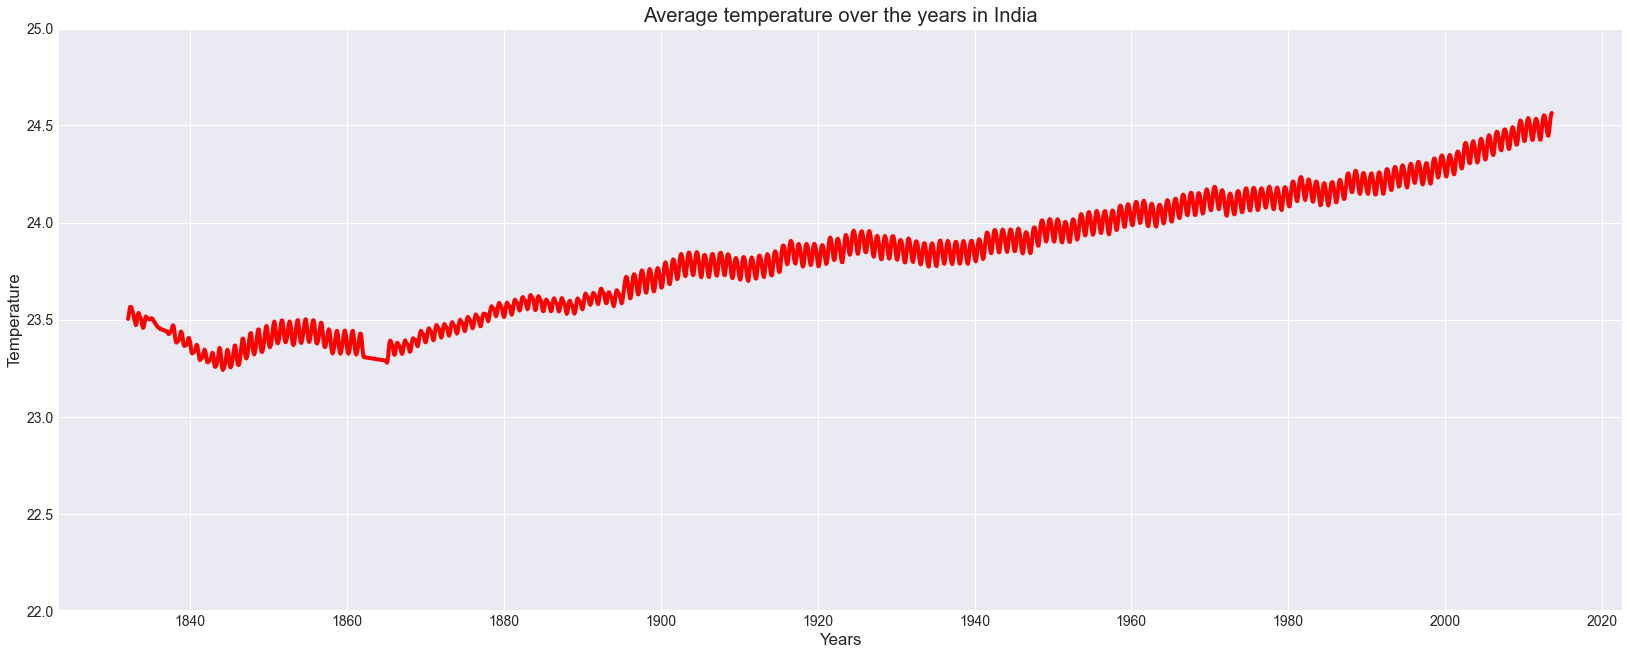

In [52]:
x='India'
df_country=df_Country[df_Country['Country']==x].rolling(window=365).mean()
df_country.dropna(inplace=True)
fig, ax = plt.subplots(figsize=(25,10))
ax.set_ylim(22,25)
ax.set_xlabel('Years')
ax.set_ylabel('Temperature')
ax.set_title(f'Average temperature over the years in {x}')
sns.lineplot(ax=ax, x=df_country.index, y=df_country['AverageTemperature'], data=df_country, color='red')

Applying the dicky fuller test to check whether the time series is stationary or not.

In [53]:
from statsmodels.tsa.stattools import adfuller

# Null Hypothesis(Ho): It is non stationary
# Alternate Hypothesis(H1): It is stationary

def adfuller_test(temp):
    result=adfuller(temp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Reject the null hypothesis, data has no unit root and is stationary")
    else:
        print("Data has a unit root, indicating it is non-stationary ")
        
adfuller_test(df_country['AverageTemperature'])

ADF Test Statistic : 1.2665422252838934
p-value : 0.9964148728726875
#Lags Used : 25
Number of Observations Used : 2118
Data has a unit root, indicating it is non-stationary 


Converting the time-series to stationary by taking the seasnal first difference as we are dealing with seasonal data.

In [54]:
df_country['Seasonal First Difference']=df_country['AverageTemperature']-df_country['AverageTemperature'].shift(12)
df_country.head(15)

AverageTemperature  AverageTemperatureUncertainty         year  \
dt                                                                           
1832-02-01           23.503921                       1.998984  1814.454795   
1832-03-01           23.521701                       1.998153  1814.553425   
1832-04-01           23.544729                       2.002323  1814.652055   
1832-05-01           23.565699                       2.002907  1814.750685   
1832-07-01           23.565348                       2.004586  1814.849315   
1832-08-01           23.552633                       2.007156  1814.947945   
1832-09-01           23.538797                       2.004260  1815.046575   
1832-10-01           23.528485                       2.003956  1815.145205   
1832-11-01           23.509025                       1.999348  1815.243836   
1833-01-01           23.484468                       1.997348  1815.345205   
1833-02-01           23.471729                       1.997619  1815.446575   
1833-03-01           23.479825                       1.996403  1815.547945   
1833-04-01           23.511104                       1.990170  1815.649315   
1833-05-01           23.527712                       1.989597  1815.747945   
1833-06-01           23.534997                       1.987507  1815.846575   

            Seasonal First Difference  
dt                                     
1832-02-01                        NaN  
1832-03-01                        NaN  
1832-04-01                        NaN  
1832-05-01                        NaN  
1832-07-01                        NaN  
1832-08-01                        NaN  
1832-09-01                        NaN  
1832-10-01                        NaN  
1832-11-01                        NaN  
1833-01-01                        NaN  
1833-02-01                        NaN  
1833-03-01                        NaN  
1833-04-01                   0.007184  
1833-05-01                   0.006011  
1833-06-01                  -0.009732

Applying the dicky fuller test again.

ADF Test Statistic : -5.821206795839178
p-value : 4.1788756894305854e-07
#Lags Used : 26
Number of Observations Used : 2105
Reject the null hypothesis, data has no unit root and is stationary


<AxesSubplot:xlabel='dt'>

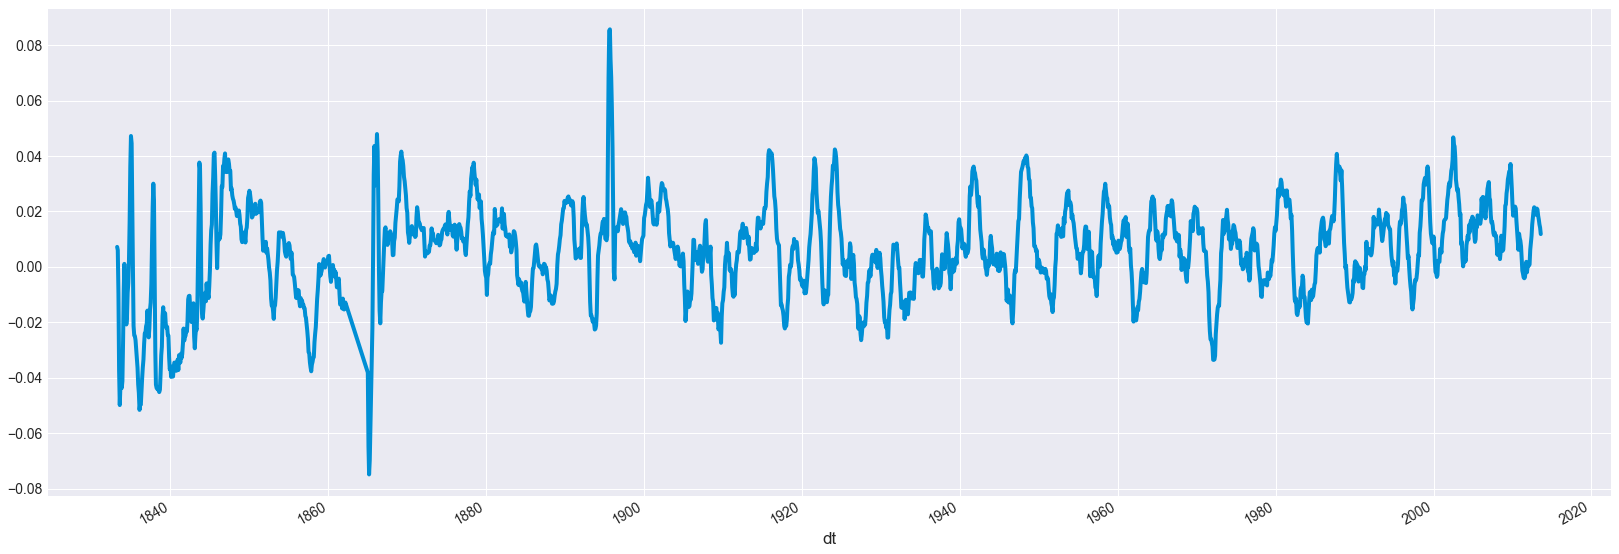

In [55]:
adfuller_test(df_country['Seasonal First Difference'].dropna())
fig=plt.figure(figsize=(25,10))
df_country['Seasonal First Difference'].plot()

Choosing the parameters of SARIMAX model (ARIMA for seasonal data)

p,d,q : p-AR model lags, d-differencing, q-MA lags

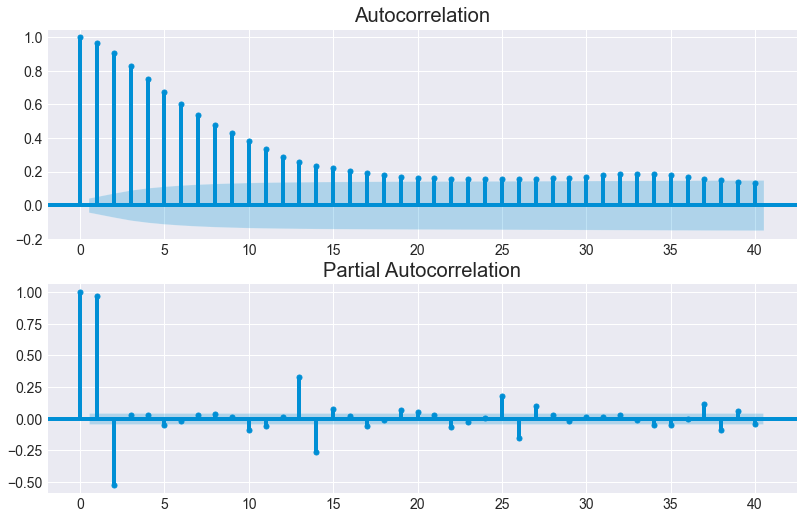

In [56]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_country['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_country['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

Fitting the SARIMAX model on the data.

In [57]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df_country['AverageTemperature'],order=(1,1,0),seasonal_order=(1,1,0,12))
model_fit=model.fit()
model_fit.summary()

D:\desktop\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

D:\desktop\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                 AverageTemperature   No. Observations:                 2144
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                9012.958
Date:                            Sat, 13 Mar 2021   AIC                         -18019.917
Time:                                    23:24:54   BIC                         -18002.924
Sample:                                         0   HQIC                        -18013.697
                                           - 2144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4900      0.010     49.963      0.000       0.471       0.509
ar.S.L12      -0.2695      0.016    -17.292      0.000      -0.300      -0.239
sigma2      1.241e-05   1.82e-07     68.201      0.000    1.21e-05    1.28e-05
===================================================================================
Ljung-Box (L1) (Q):                  20.16   Jarque-Bera (JB):              5937.85
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

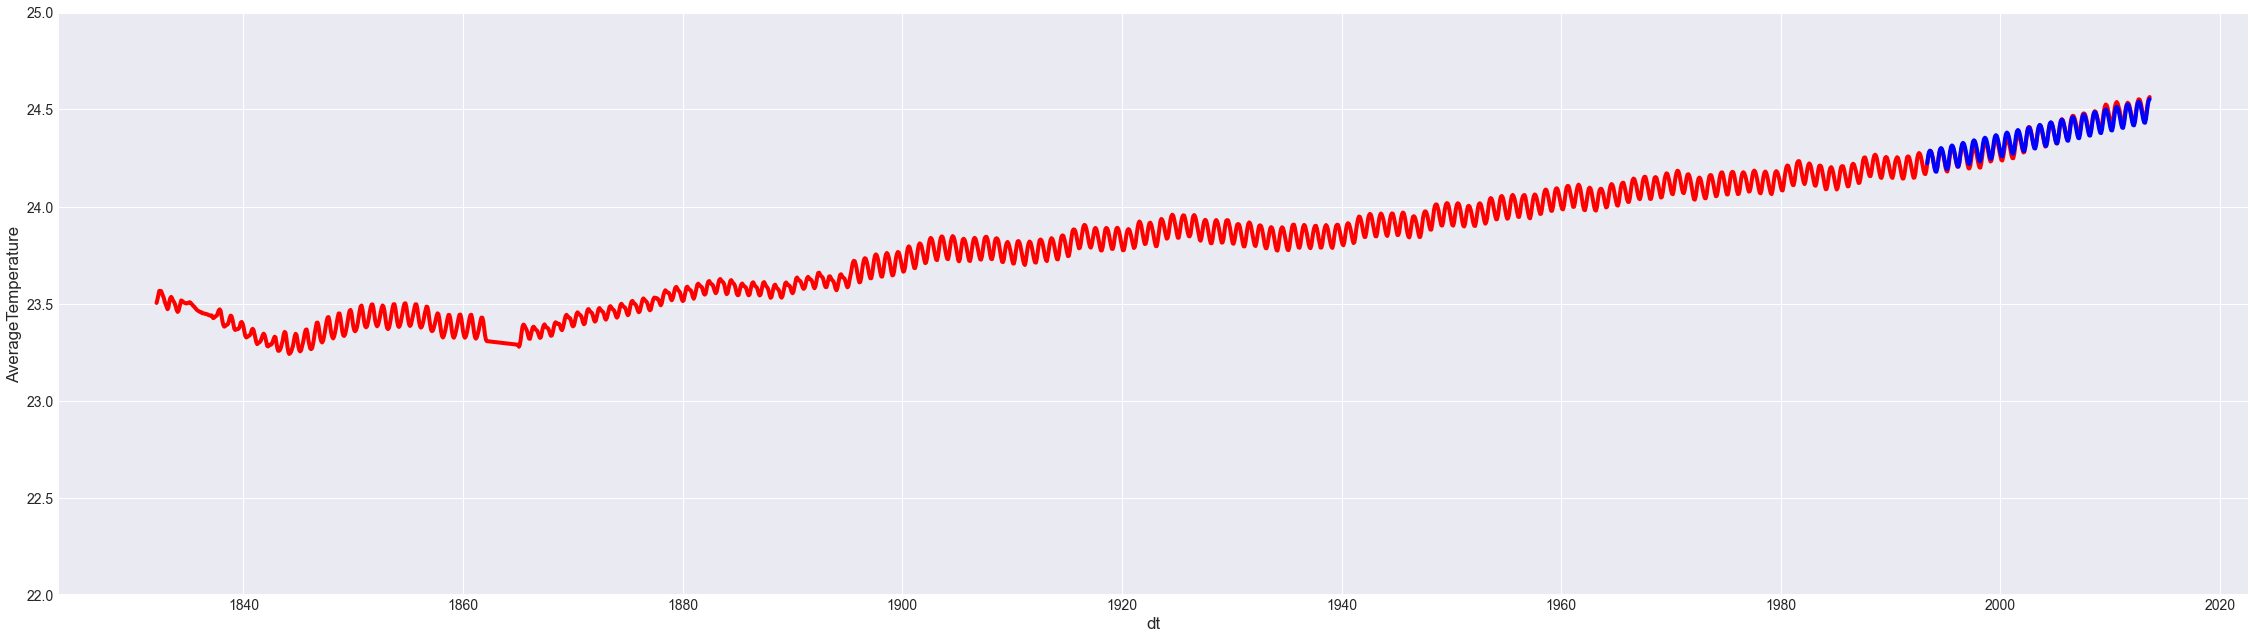

In [58]:
df_country['forecast']=model_fit.predict(start=1900,end=2143,dynamic=True)
fig, ax = plt.subplots(figsize=(35,10))
ax.set_ylim(22,25)
sns.lineplot(ax=ax, x=df_country.index, y=df_country['AverageTemperature'], data=df_country, color='red')
sns.lineplot(ax=ax, x=df_country.index, y=df_country['forecast'], data=df_country, color='blue')

Expanded view.

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

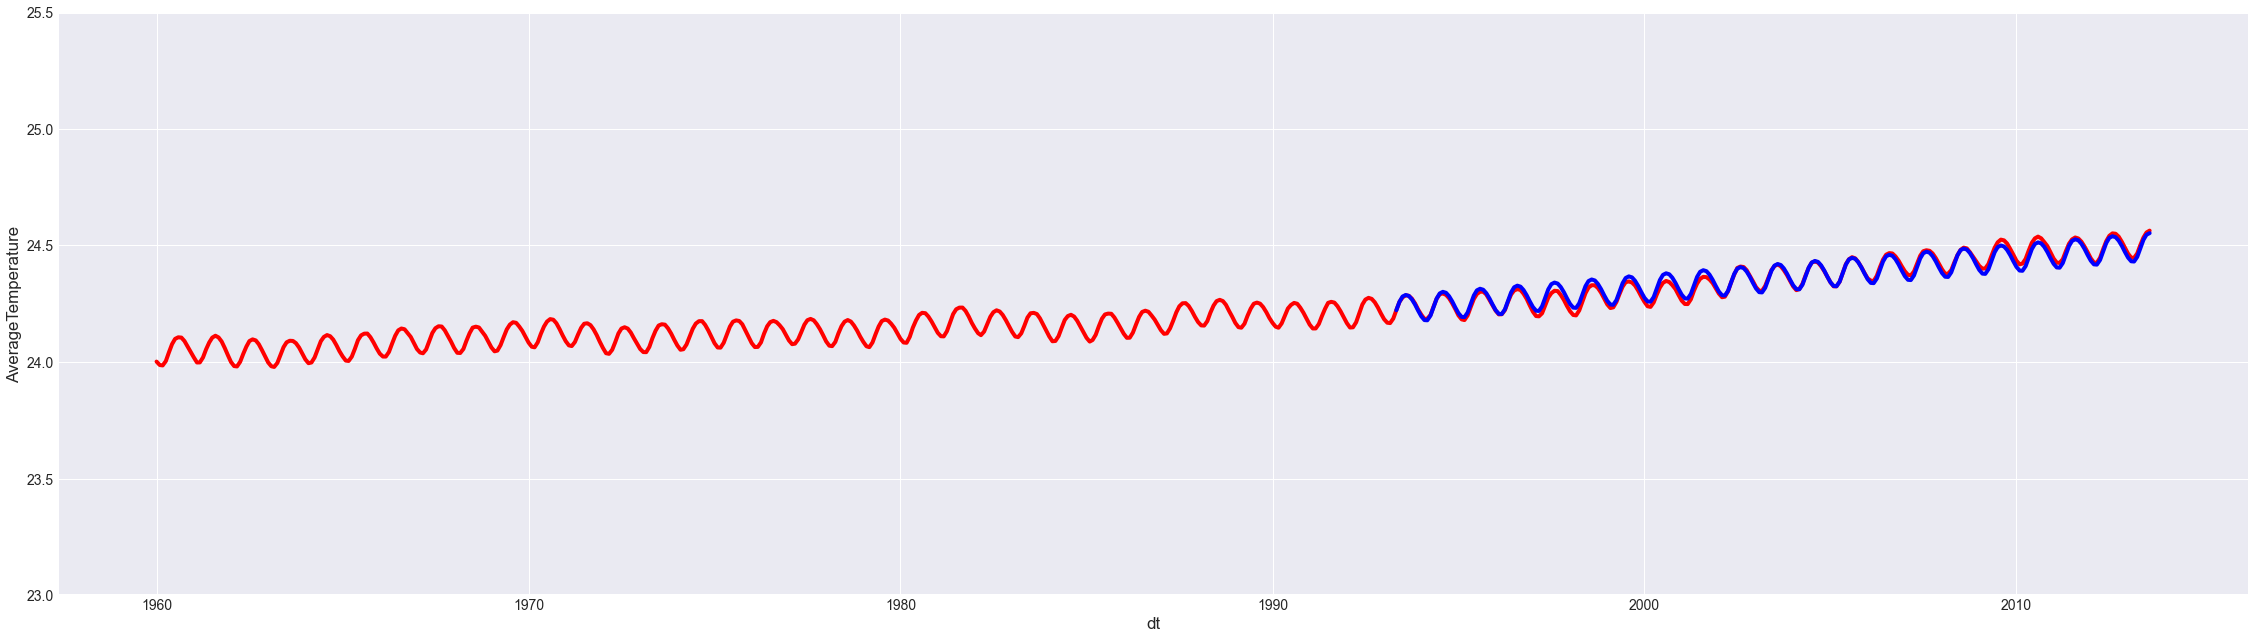

In [59]:
df_country1=df_country[1500:2144]
df_country1['forecast']=model_fit.predict(start=1900,end=2143,dynamic=True)

fig, ax = plt.subplots(figsize=(35,10))
ax.set_ylim(23,25.5)
sns.lineplot(ax=ax, x=df_country1.index, y=df_country1['AverageTemperature'], data=df_country1, color='red')
sns.lineplot(ax=ax, x=df_country1.index, y=df_country1['forecast'], data=df_country1, color='blue')

The model has fit the data really well.

### State-wise Modelling

Average temperature over the years in Andhra Pradesh after applying smoothing parameter.

<AxesSubplot:title={'center':'Average temperature over the years in Andhra Pradesh'}, xlabel='Years', ylabel='Temperature'>

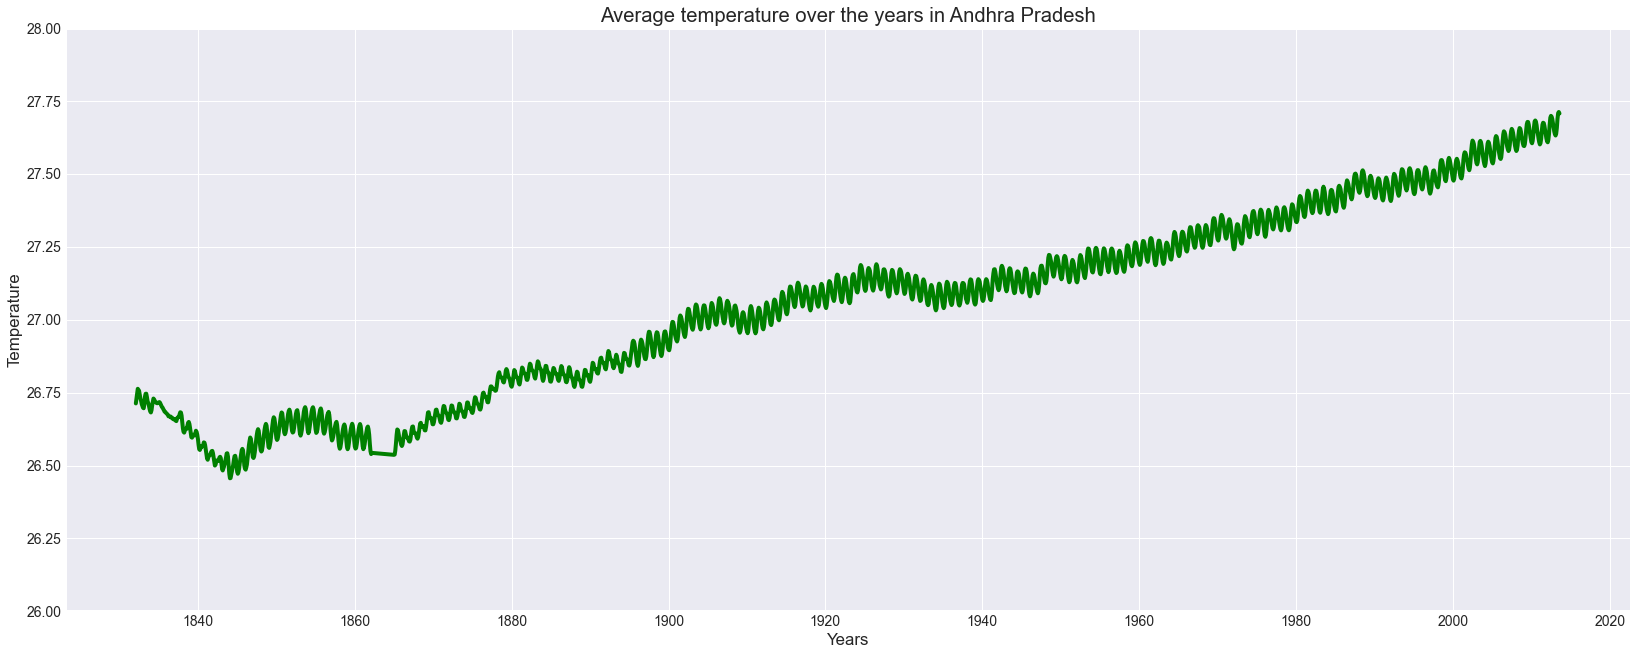

In [60]:
x='Andhra Pradesh'
df_State=df_state[df_state['State']==x].rolling(window=365).mean()
df_State.dropna(inplace=True)
fig, ax = plt.subplots(figsize=(25,10))
ax.set_ylim(26,28)
ax.set_xlabel('Years')
ax.set_ylabel('Temperature')
ax.set_title(f'Average temperature over the years in {x}')
sns.lineplot(ax=ax, x=df_State.index, y=df_State['AverageTemperature'], data=df_State, color='green')

Applying dicky fuller test.

In [61]:
adfuller_test(df_State['AverageTemperature'])

ADF Test Statistic : 0.876207654318122
p-value : 0.9927718402383329
#Lags Used : 26
Number of Observations Used : 2117
Data has a unit root, indicating it is non-stationary 


Converting to stationary.

In [62]:
df_State['Seasonal First Difference']=df_State['AverageTemperature']-df_State['AverageTemperature'].shift(12)
df_State.head(15)

AverageTemperature  AverageTemperatureUncertainty         year  \
dt                                                                           
1832-02-01           26.712879                       2.321033  1814.454795   
1832-03-01           26.729230                       2.320805  1814.553425   
1832-04-01           26.747233                       2.327055  1814.652055   
1832-05-01           26.763038                       2.330315  1814.750685   
1832-07-01           26.756282                       2.333008  1814.849315   
1832-08-01           26.741932                       2.339534  1814.947945   
1832-09-01           26.729849                       2.334803  1815.046575   
1832-10-01           26.722430                       2.335304  1815.145205   
1832-11-01           26.710890                       2.329132  1815.243836   
1833-01-01           26.697929                       2.327471  1815.345205   
1833-02-01           26.696227                       2.327364  1815.446575   
1833-03-01           26.708989                       2.324860  1815.547945   
1833-04-01           26.736022                       2.316860  1815.649315   
1833-05-01           26.746000                       2.316951  1815.747945   
1833-06-01           26.746225                       2.313515  1815.846575   

            Seasonal First Difference  
dt                                     
1832-02-01                        NaN  
1832-03-01                        NaN  
1832-04-01                        NaN  
1832-05-01                        NaN  
1832-07-01                        NaN  
1832-08-01                        NaN  
1832-09-01                        NaN  
1832-10-01                        NaN  
1832-11-01                        NaN  
1833-01-01                        NaN  
1833-02-01                        NaN  
1833-03-01                        NaN  
1833-04-01                   0.023142  
1833-05-01                   0.016770  
1833-06-01                  -0.001008

ADF Test Statistic : -5.9001056647148475
p-value : 2.7910624452743005e-07
#Lags Used : 26
Number of Observations Used : 2105
Reject the null hypothesis, data has no unit root and is stationary


<AxesSubplot:xlabel='dt'>

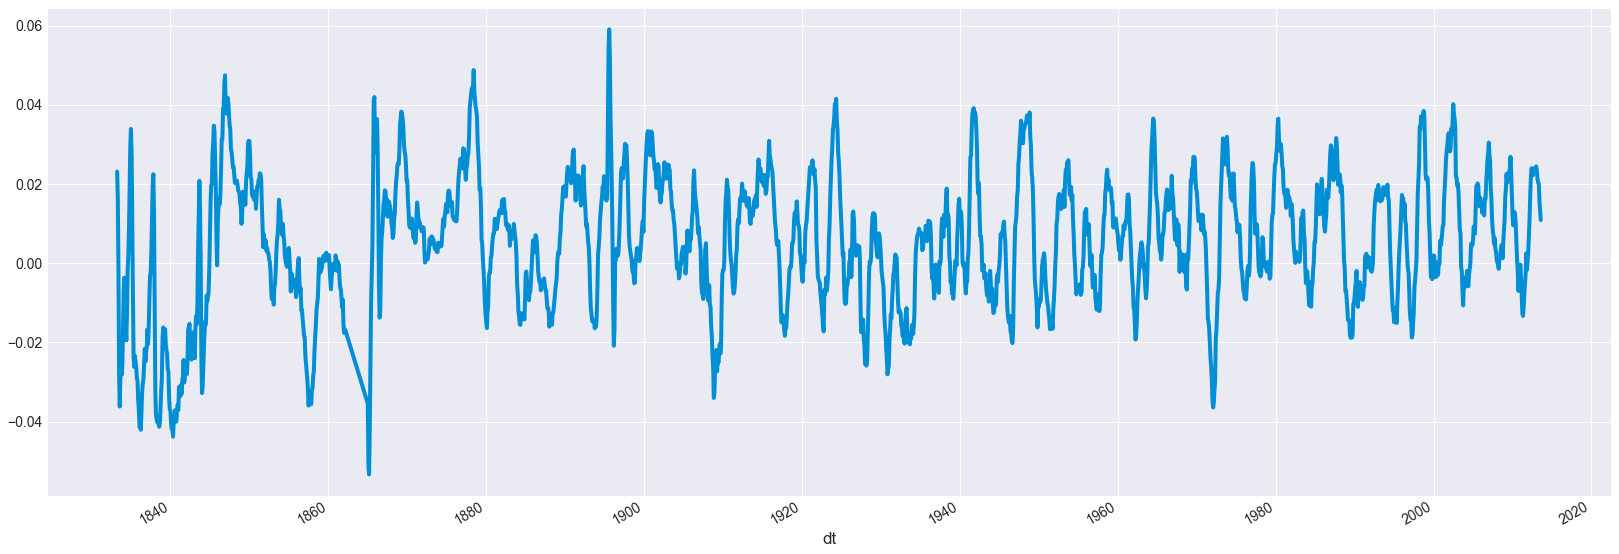

In [63]:
adfuller_test(df_State['Seasonal First Difference'].dropna())
fig=plt.figure(figsize=(25,10))
df_State['Seasonal First Difference'].plot()

Choosing SARIMAX parameters and fitting the parameters.

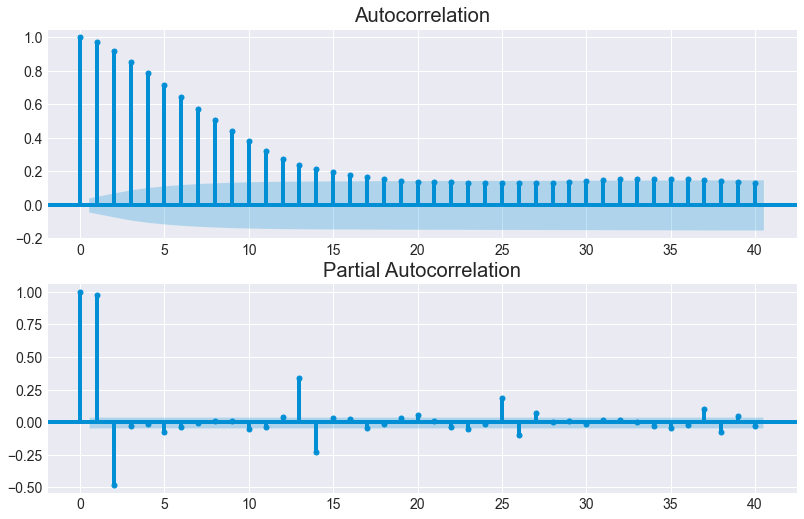

In [64]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_State['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_State['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [65]:
model=sm.tsa.statespace.SARIMAX(df_State['AverageTemperature'],order=(1,1,0),seasonal_order=(1,1,0,12))
model_fit=model.fit()
model_fit.summary()

D:\desktop\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

D:\desktop\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                 AverageTemperature   No. Observations:                 2144
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                9232.530
Date:                            Sat, 13 Mar 2021   AIC                         -18459.059
Time:                                    23:25:08   BIC                         -18442.066
Sample:                                         0   HQIC                        -18452.840
                                           - 2144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4616      0.013     36.624      0.000       0.437       0.486
ar.S.L12      -0.3480      0.015    -22.848      0.000      -0.378      -0.318
sigma2      1.007e-05   1.78e-07     56.677      0.000    9.72e-06    1.04e-05
===================================================================================
Ljung-Box (L1) (Q):                   7.09   Jarque-Bera (JB):              2237.32
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

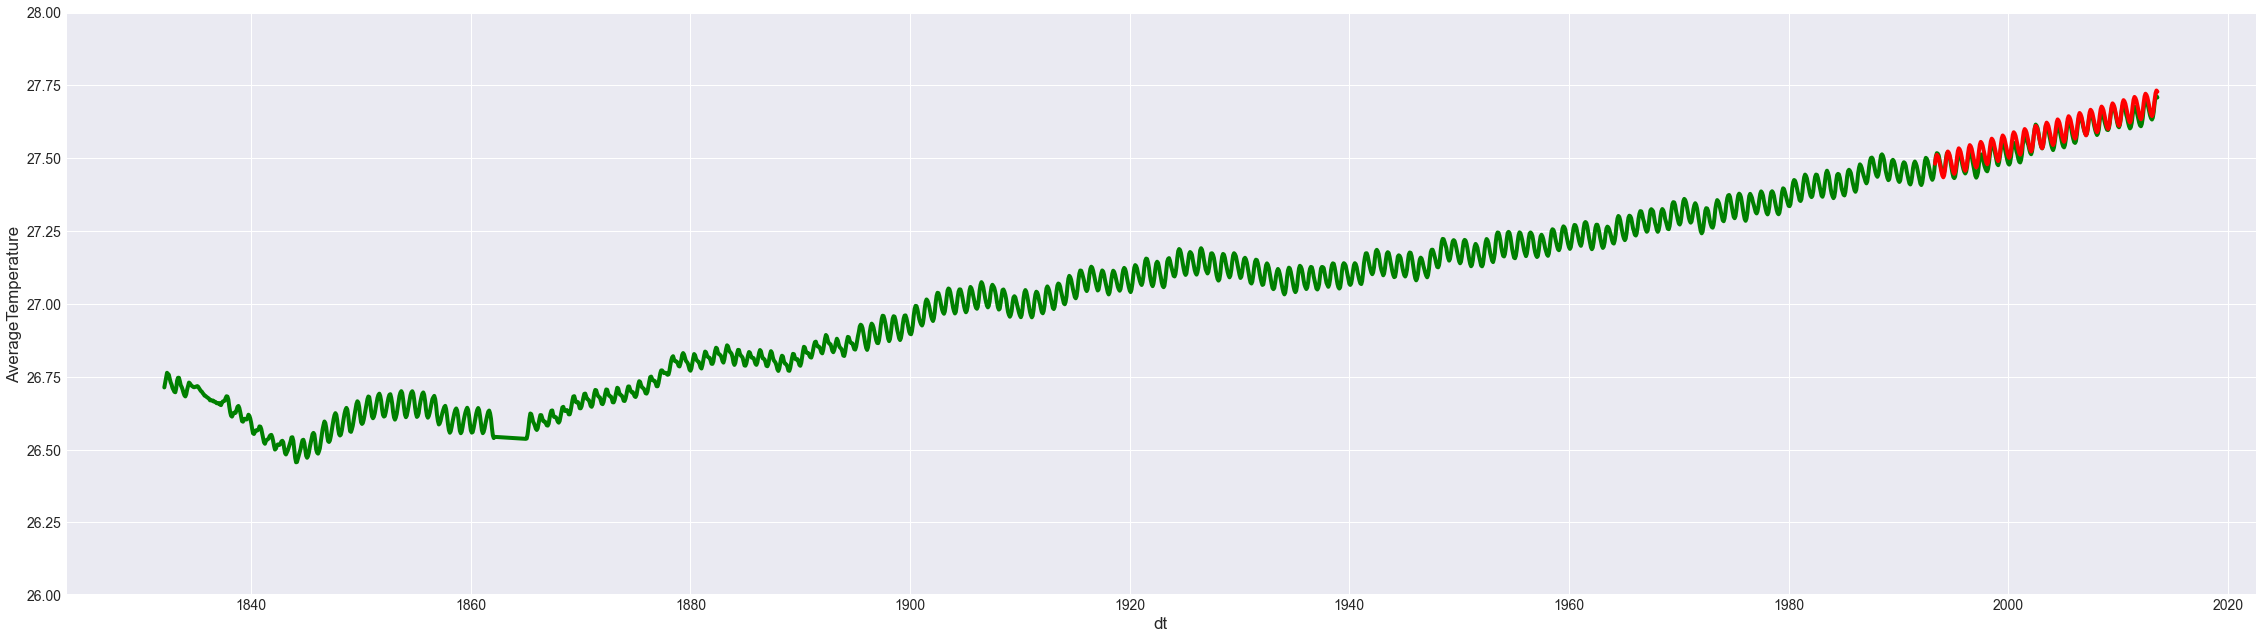

In [66]:
df_State['forecast']=model_fit.predict(start=1900,end=2143,dynamic=True)
fig, ax = plt.subplots(figsize=(35,10))
ax.set_ylim(26,28)
sns.lineplot(ax=ax, x=df_State.index, y=df_State['AverageTemperature'], data=df_State, color='green')
sns.lineplot(ax=ax, x=df_State.index, y=df_State['forecast'], data=df_State, color='red')

Expanded view.

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

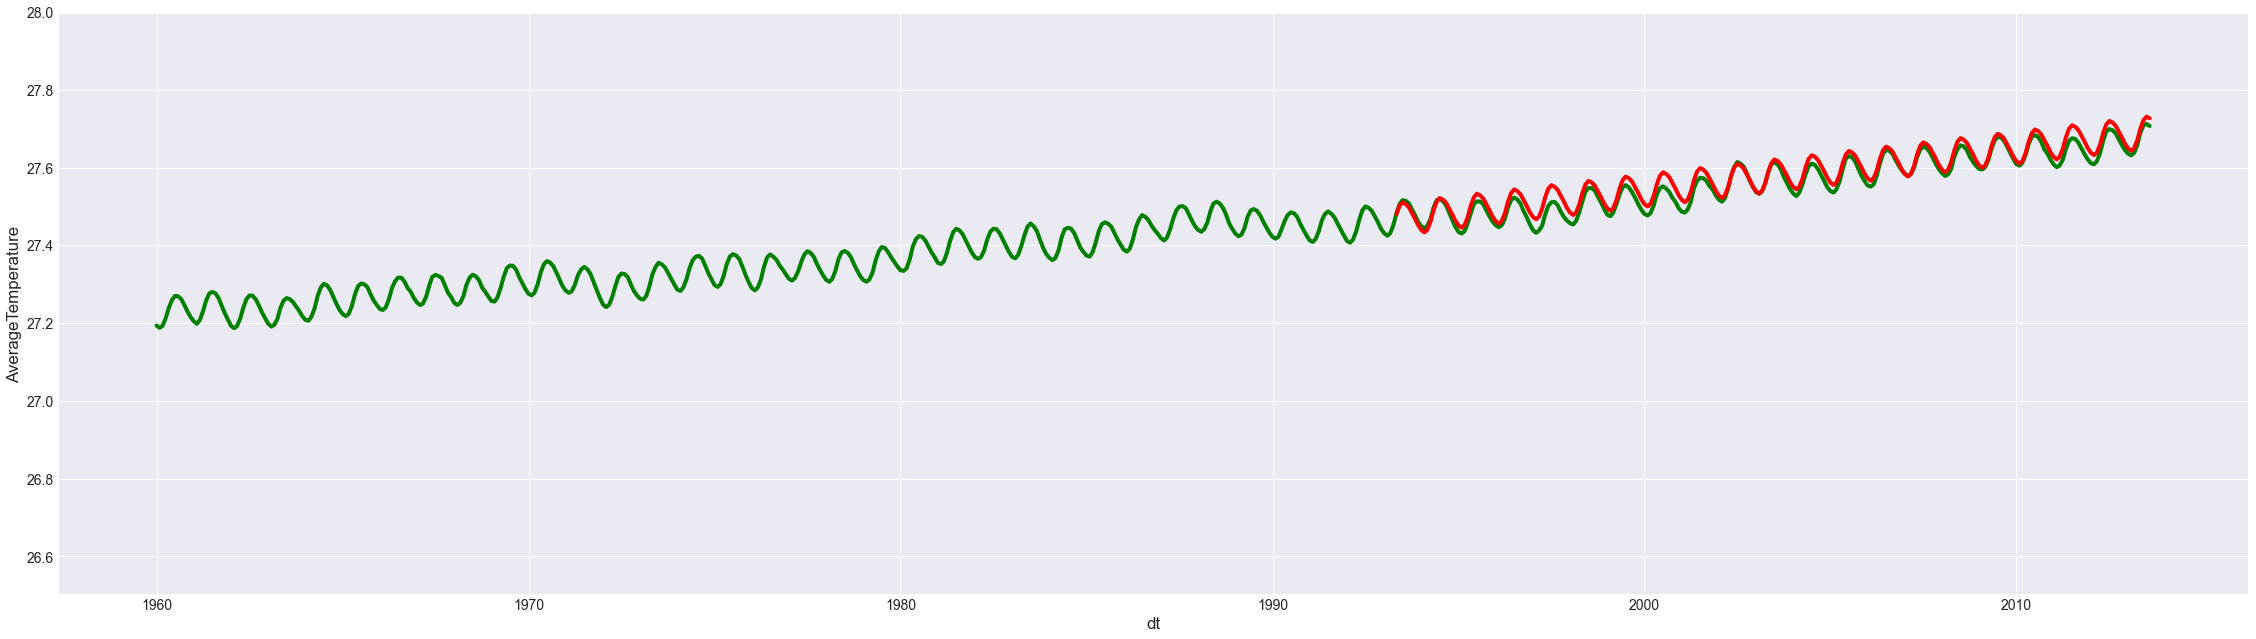

In [67]:
df_State1=df_State[1500:2144]
df_State1['forecast']=model_fit.predict(start=1900,end=2143,dynamic=True)

fig, ax = plt.subplots(figsize=(35,10))
ax.set_ylim(26.5,28)
sns.lineplot(ax=ax, x=df_State1.index, y=df_State1['AverageTemperature'], data=df_State1, color='green')
sns.lineplot(ax=ax, x=df_State1.index, y=df_State1['forecast'], data=df_State1, color='red')

Once again, the model has fit the data really well.

### Global Data Modelling

Checking trends in the dataset.

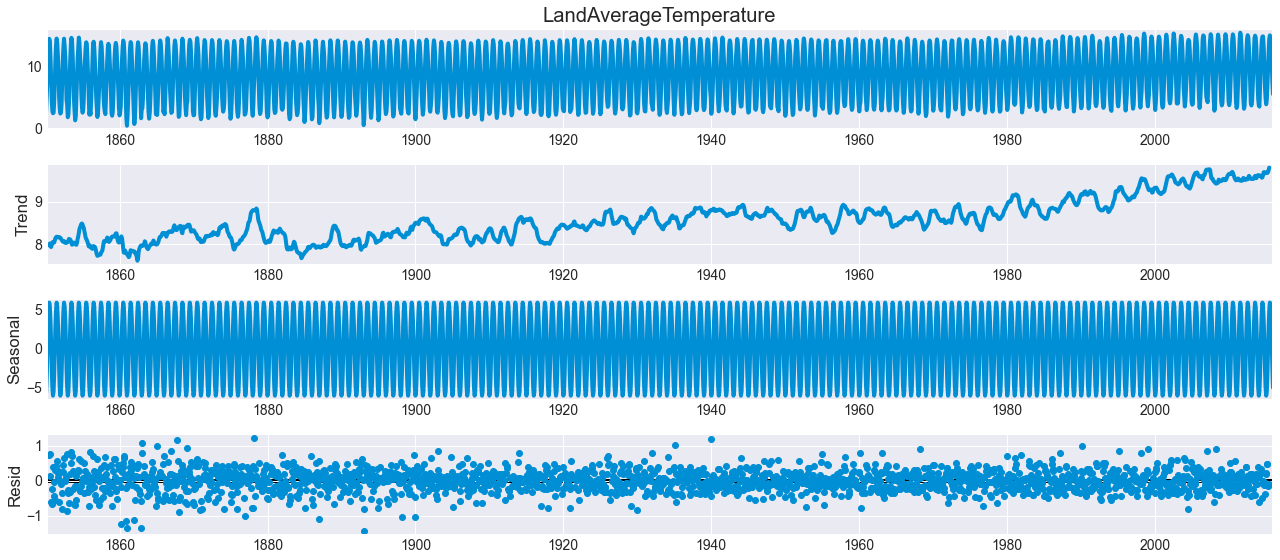

In [68]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df_global['LandAverageTemperature'], model='additive')
fig = decomposition.plot()
plt.show()

<AxesSubplot:title={'center':'Land Average Temperature over the Years'}, xlabel='Years', ylabel='Temperature'>

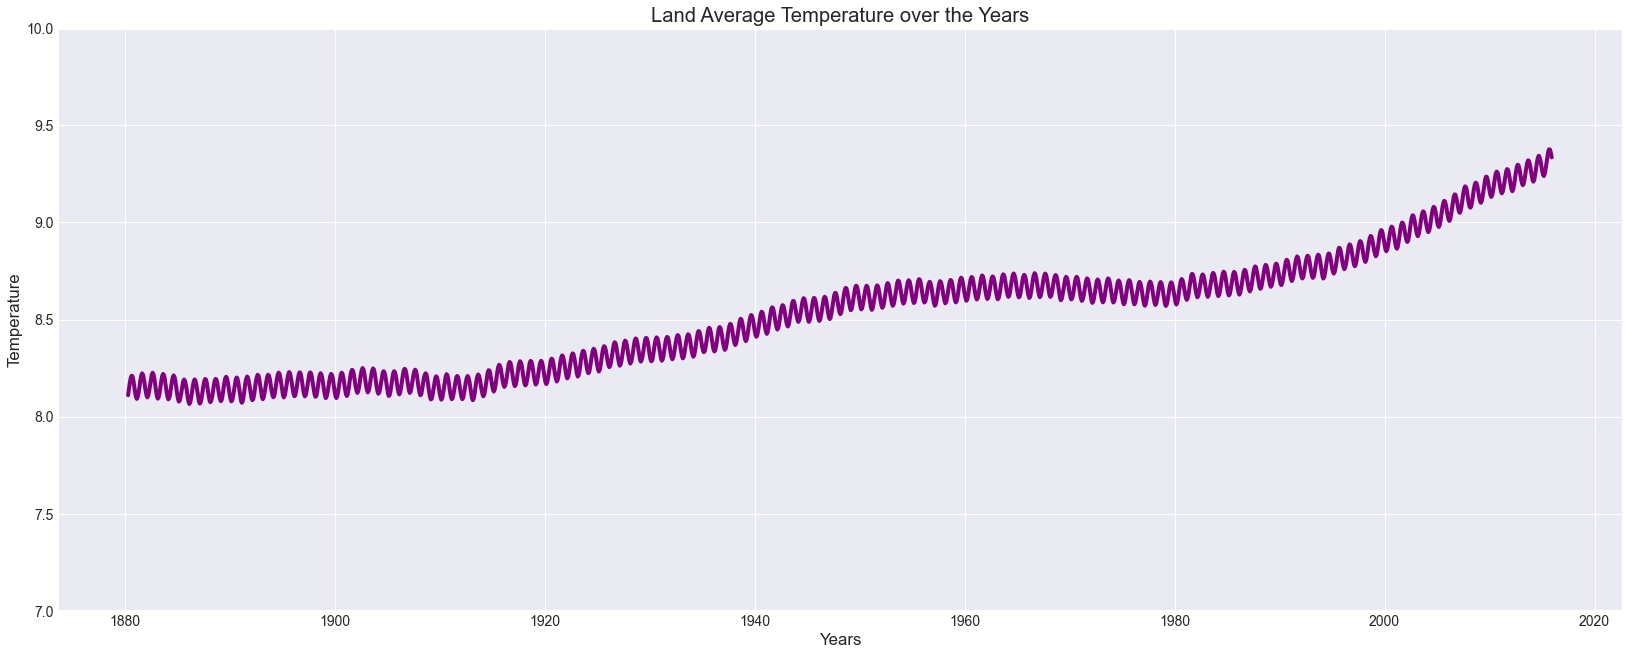

In [69]:
df_global1 = df_global.rolling(window=365).mean()
fig, ax = plt.subplots(figsize=(25,10))
ax.set_ylim(7,10)
ax.set_xlabel('Years')
ax.set_ylabel('Temperature')
ax.set_title('Land Average Temperature over the Years')
sns.lineplot(ax=ax, x=df_global1.index, y=df_global1['LandAverageTemperature'], data=df_global1, color='purple')

Applying the dicky fuller test for stationarity.

In [70]:
adfuller_test(df_global['LandAverageTemperature'])

ADF Test Statistic : -1.4553284418997976
p-value : 0.5554827476053812
#Lags Used : 26
Number of Observations Used : 1965
Data has a unit root, indicating it is non-stationary 


Converting to stationary.

In [71]:
df_global['Seasonal First Difference'] = df_global['LandAverageTemperature'] - df_global['LandAverageTemperature'].shift(12)
adfuller_test(df_global['Seasonal First Difference'].dropna())

ADF Test Statistic : -12.78337451498277
p-value : 7.334161577172377e-24
#Lags Used : 24
Number of Observations Used : 1955
Reject the null hypothesis, data has no unit root and is stationary


<AxesSubplot:xlabel='dt'>

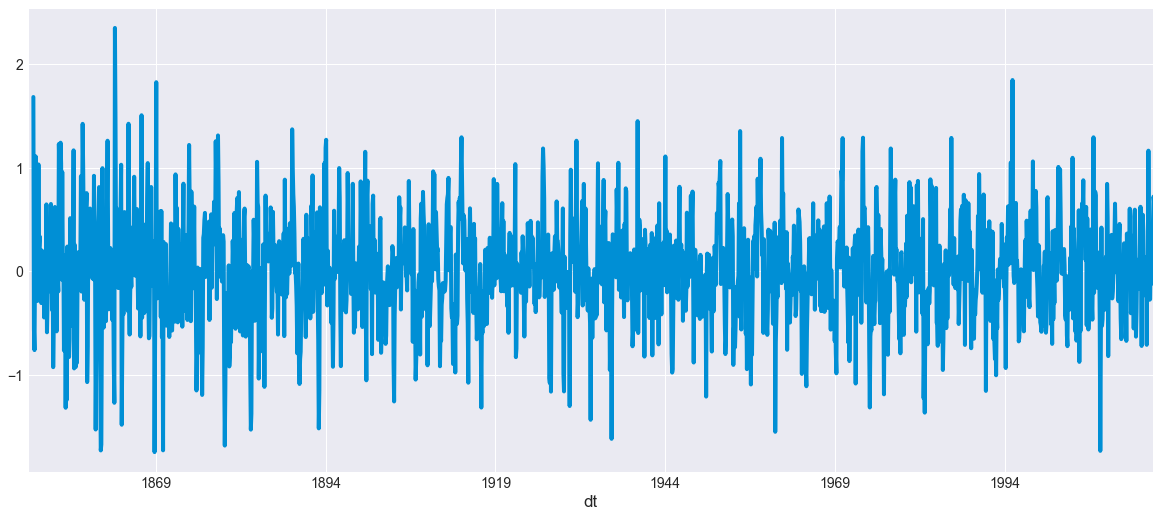

In [72]:
df_global['Seasonal First Difference'].plot()

Choosing SARIMAX parameters and fitting the model.

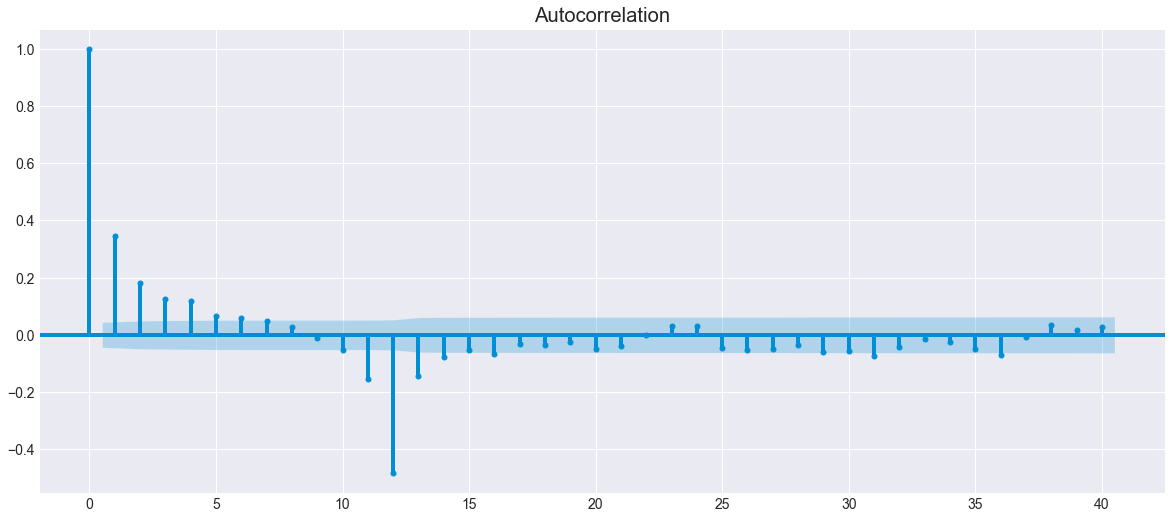

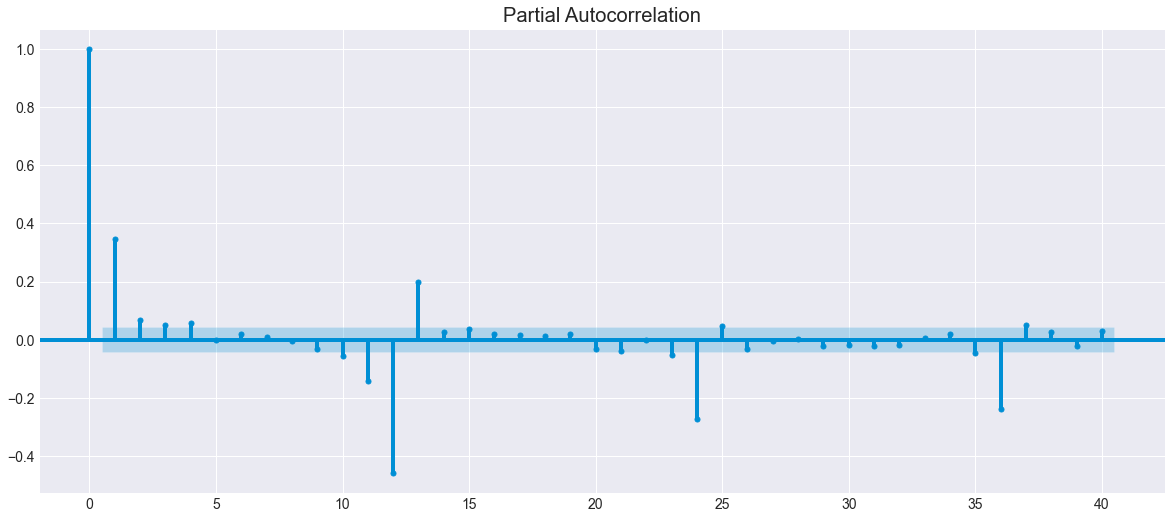

In [73]:
fig = sm.graphics.tsa.plot_acf(df_global['Seasonal First Difference'].iloc[12:],lags=40)
fig = sm.graphics.tsa.plot_pacf(df_global['Seasonal First Difference'].iloc[12:],lags=40)

In [74]:
model1=sm.tsa.statespace.SARIMAX(df_global1['LandAverageTemperature'],order=(2, 1, 1),seasonal_order=(2,1,1,12))
results=model1.fit()

D:\desktop\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

D:\desktop\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

D:\desktop\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<AxesSubplot:xlabel='dt', ylabel='LandAverageTemperature'>

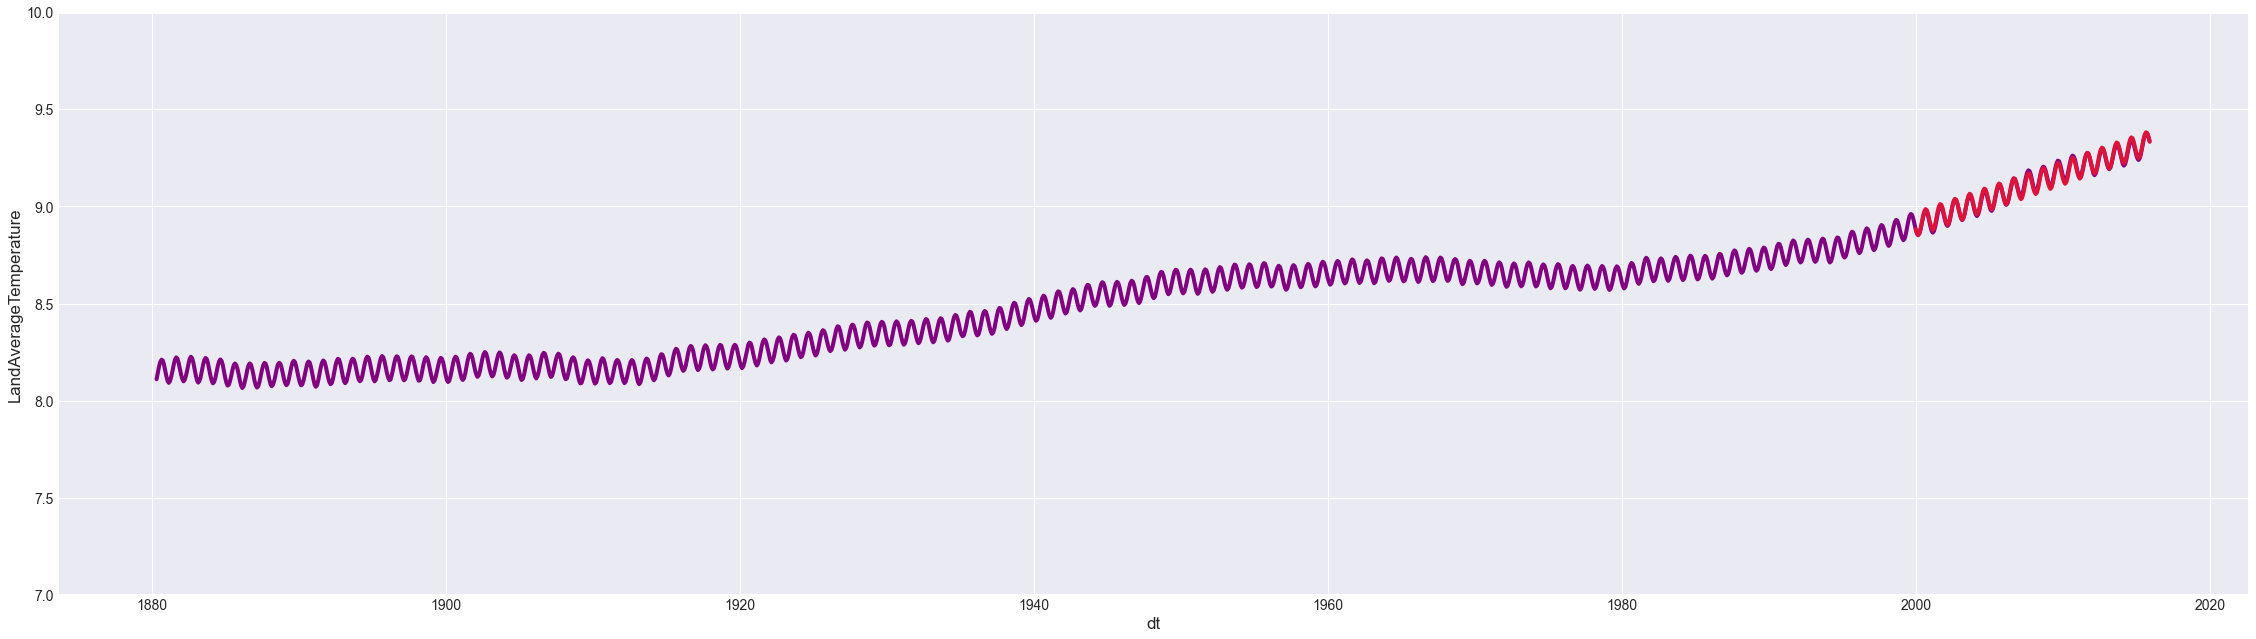

In [75]:
df_global1['forecast']=results.predict(start=1800,end=1992,dynamic=True)
fig, ax = plt.subplots(figsize=(35,10))
ax.set_ylim(7,10)
sns.lineplot(ax=ax, x=df_global1.index, y=df_global1['LandAverageTemperature'], data=df_global1, color='purple')
sns.lineplot(ax=ax, x=df_global1.index, y=df_global1['forecast'], data=df_global1, color='crimson')

Expanded version.

<AxesSubplot:xlabel='dt', ylabel='LandAverageTemperature'>

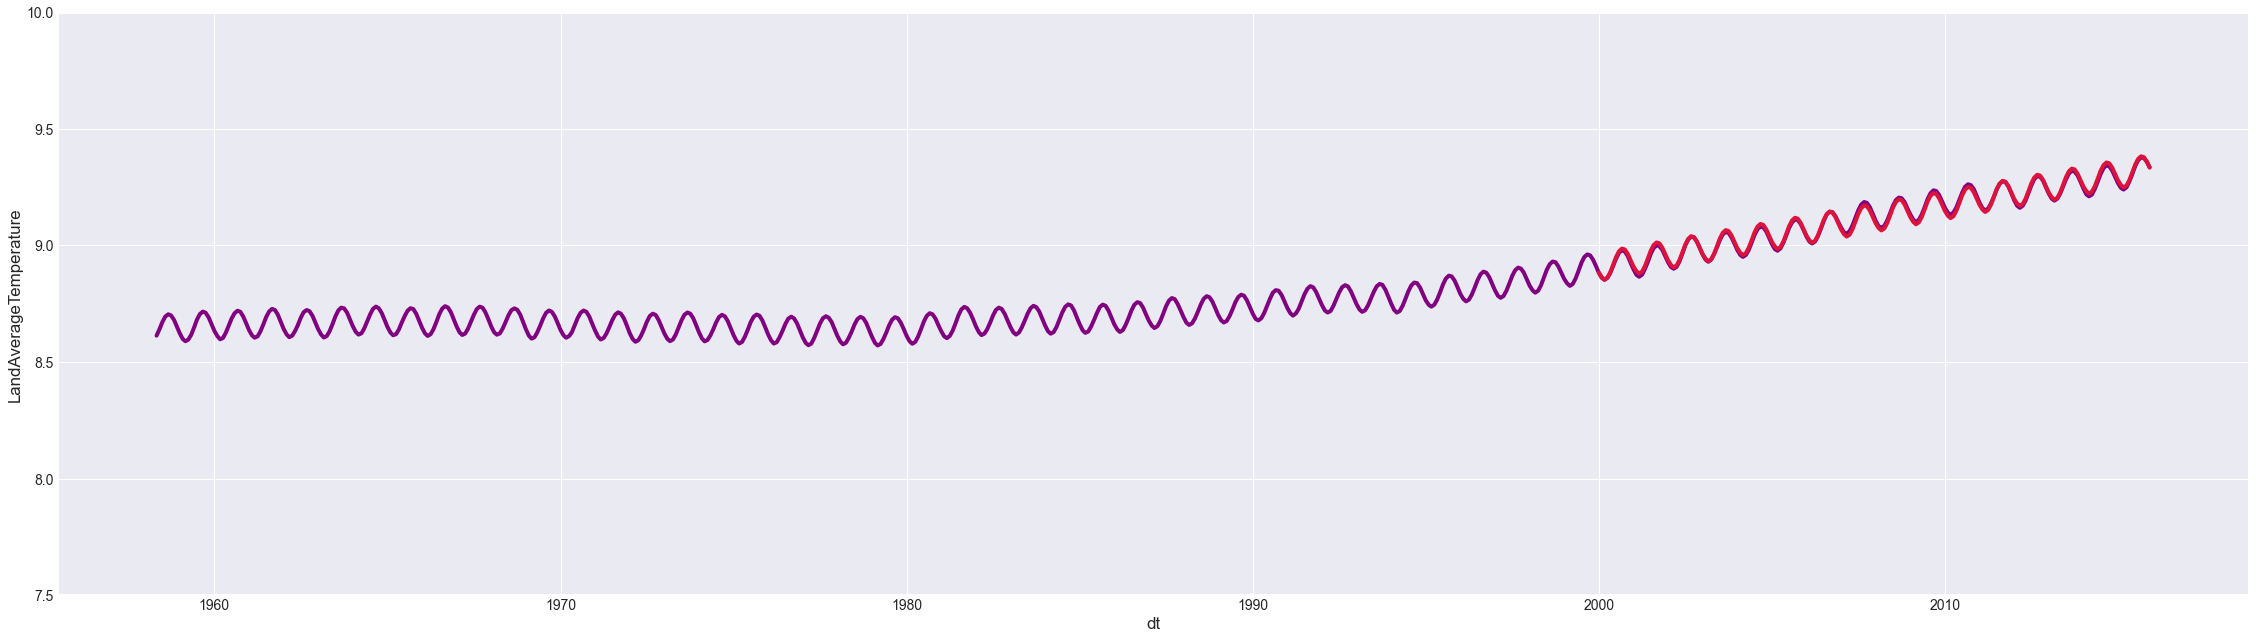

In [76]:
df_global2=df_global1[1300:1993]
df_global2['forecast']=results.predict(start=1800,end=1992,dynamic=True)

fig, ax = plt.subplots(figsize=(35,10))
ax.set_ylim(7.5,10)
sns.lineplot(ax=ax, x=df_global2.index, y=df_global2['LandAverageTemperature'], data=df_global2, color='purple')
sns.lineplot(ax=ax, x=df_global2.index, y=df_global2['forecast'], data=df_global2, color='crimson')

Just like the previous two times, the model has fit the data very well.

Forecasting the global land average temperatures for the next 15 years from 2015 to 2030 using the fitted SARIMAX model.

D:\desktop\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning:

Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.



<AxesSubplot:title={'center':'Forecast of Land Average Temperature for the next 15 years from 2015 to 2030'}, xlabel='Years', ylabel='Temperature'>

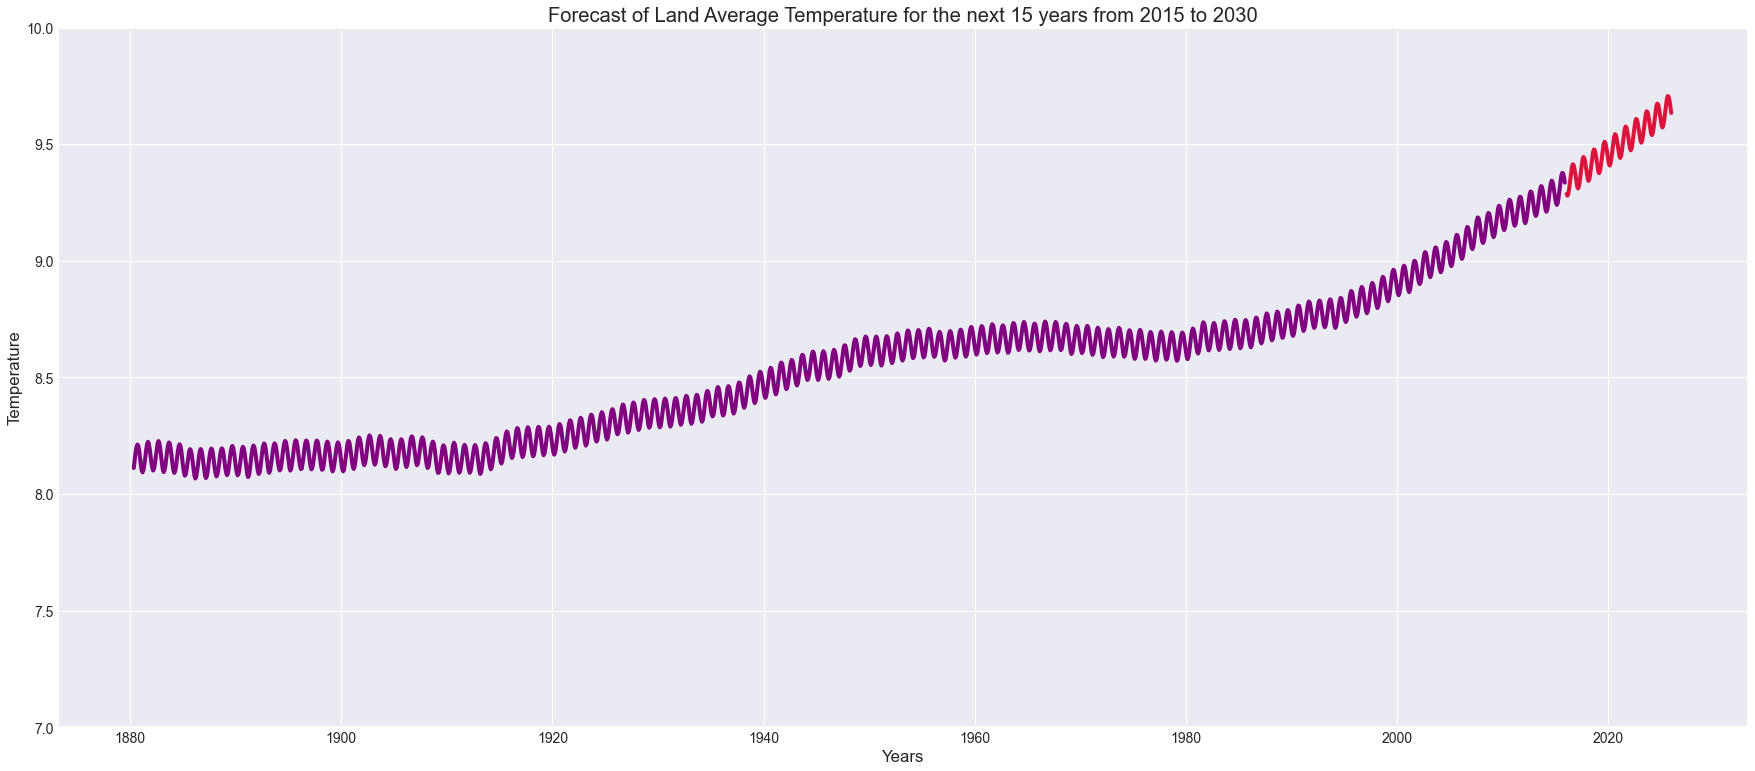

In [77]:
from pandas.tseries.offsets import DateOffset
future_dates=[df_global1.index[-1]+ DateOffset(months=x)for x in range(0,240)]

future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df_global.columns)

future_df=pd.concat([df_global1,future_datest_df])

future_df['forecast'] = results.predict(start = 1993, end = 2112, dynamic= True)  

fig, ax = plt.subplots(figsize=(27,12))
ax.set_ylim(7,10)
ax.set_ylabel('Temperature')
ax.set_xlabel('Years')
ax.set_title('Forecast of Land Average Temperature for the next 15 years from 2015 to 2030')
sns.lineplot(ax=ax, x=future_df.index, y=future_df['LandAverageTemperature'], data=future_df, color='purple')
sns.lineplot(ax=ax, x=future_df.index, y=future_df['forecast'], data=future_df, color='crimson')

Expanded version.

D:\desktop\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning:

Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.



<AxesSubplot:title={'center':'Forecast of Land Average Temperature for the next 15 years from 2015 to 2030'}, xlabel='Years', ylabel='Temperature'>

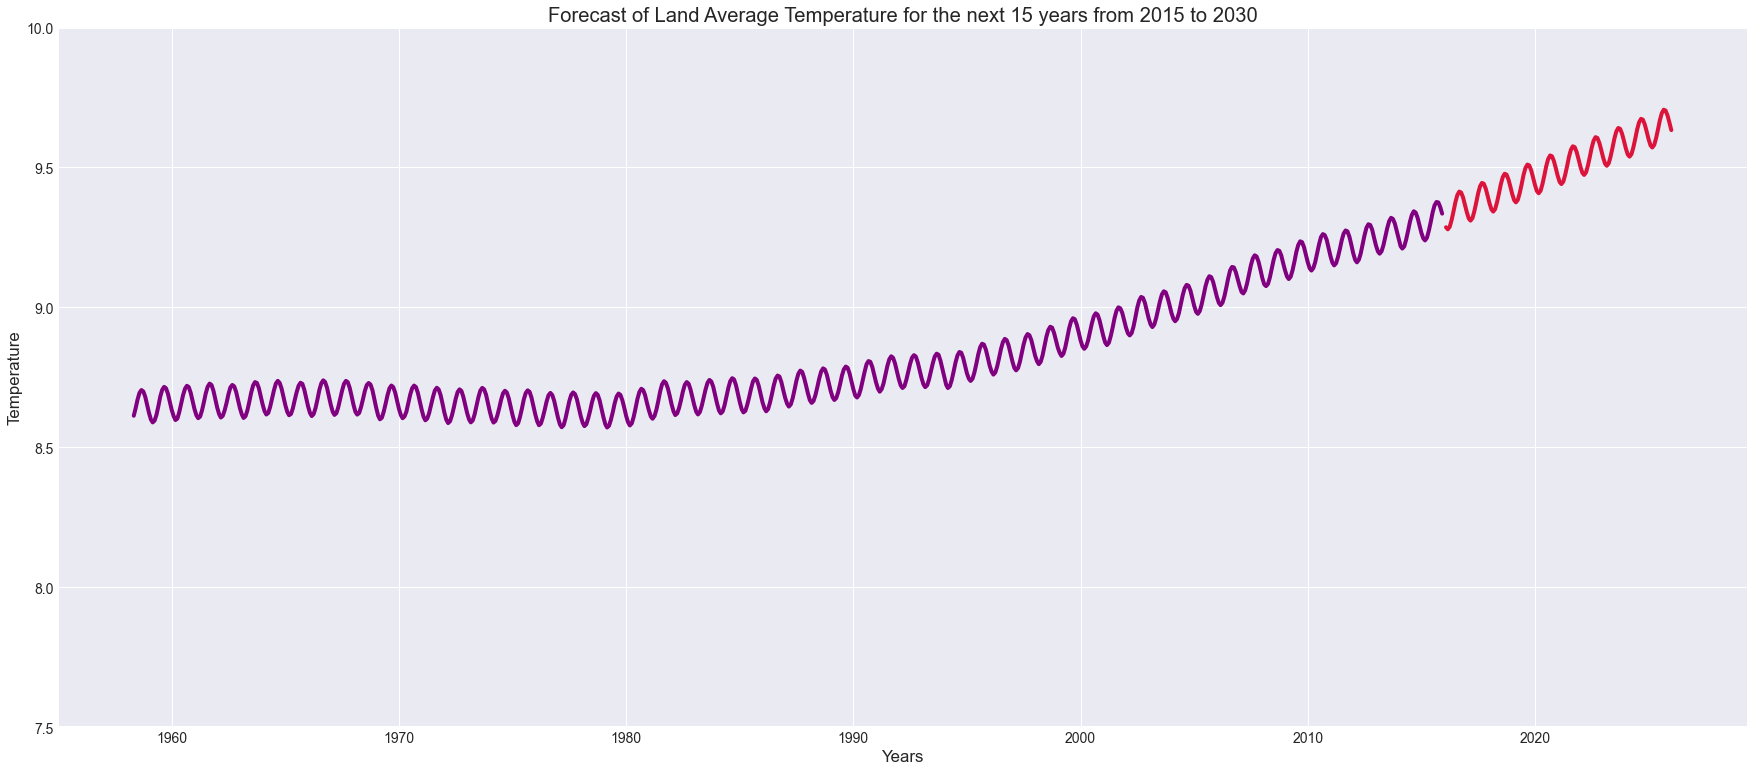

In [78]:
future_dates=[df_global2.index[-1]+ DateOffset(months=x)for x in range(0,180)]

future_datest_df2=pd.DataFrame(index=future_dates[1:],columns=df_global.columns)

future_df2=pd.concat([df_global2,future_datest_df2])

future_df2['forecast'] = results.predict(start = 1993, end = 2112, dynamic= True)  

fig, ax = plt.subplots(figsize=(27,12))
ax.set_ylim(7.5,10)
ax.set_ylabel('Temperature')
ax.set_xlabel('Years')
ax.set_title('Forecast of Land Average Temperature for the next 15 years from 2015 to 2030')
sns.lineplot(ax=ax, x=future_df2.index, y=future_df2['LandAverageTemperature'], data=future_df2, color='purple')
sns.lineplot(ax=ax, x=future_df2.index, y=future_df2['forecast'], data=future_df2, color='crimson')